### CONTEXT

You and your friend came up with a brilliant startup idea - provide risk evaluation as a service for retail banks. As with most successful startup teams, both of you have your specialty. Your friend is responsible for sales and operations, while you are responsible for everything product-related, from planning to data analysis to building the solution. You have quickly identified that machine learning will be an essential part of your offering because you believe that the models can capture statistical patterns in the defaults on bank loans. You decide to start your investigation by downloading this dataset from Home Credit Group. You are not yet sure, what is the most crucial problem for your potential clients, so you had a meeting with your friend to discuss how your proof-of-concept (POC) product should look like. After a lot of arguing, you both agreed to create a number of different models so that you have a robust and diversified offering when you get your first meeting with the potential clients. You are eager to investigate the dataset and see what you can predict, so you propose that you come up with interesting features to analyze and predict - this way, you'll focus on building a solid offering, and she can work on getting meetings with the banks.

# CAPSTONE PROJECT - Machine Learning

## OBJECTIVES FOR THIS PART

* Practice translating business requirements into data science tasks.
* Practice performing EDA.
* Practice applying statistical inference procedures.
* Practice using machine learning to solve business problems.
* Practice deploying multiple machine learning models.

## REQUIREMENTS

* Download the data from [here](https://storage.googleapis.com/341-home-credit-default/home-credit-default-risk.zip) and the data description from [here](https://storage.googleapis.com/341-home-credit-default/Home%20Credit%20Default%20Risk.pdf).
* Create a plan for your investigation, analysis, and POC building. This should include your assumptions, overall objectives, and objectives for each step in your plan. You are not expected to have a plan for the whole project but instead have a clear understanding of what you'll try to achieve in the next step and build the plan one step at a time.
* Perform exploratory data analysis. This should include creating statistical summaries and charts, testing for anomalies, checking for correlations and other relations between variables, and other EDA elements.
* Perform statistical inference. This should include defining the target population, forming multiple statistical hypotheses and constructing confidence intervals, setting the significance levels, conducting z or t-tests for these hypotheses.
* Use machine learning models to predict the target variables based on your proposed plan. You should use hyperparameter tuning, model ensembling, the analysis of model selection, and other methods. The decision of where to use and not to use these techniques is up to you; however, they should be aligned with your team's objectives.
* Deploy these machine learning models to Google Cloud Platform. You are free to choose any deployment option you wish as long as it can be called an HTTP request.
* Provide clear explanations in your notebook. Your explanations should inform the reader what you are trying to achieve, what results you got, and what these results mean.
* Provide suggestions about how your analysis and models can be improved.

## PROJECT DESIGN

1. Frame the problem and look at the big picture.

2. Get the data.

3. Explore the data to gain insights.

4. Prepare the data to better expose the underlying data patterns to Machine Learning algorithms.

5. Explore many different models and shortlist the best ones.

6. Fine-tune your models and combine them into a great solution.

7. Present your solution.

### 1. THE PROBLEM

You and your friend came up with a brilliant startup idea - provide risk evaluation as a service for retail banks. As with most successful startup teams, both of you have your specialty. Your friend is responsible for sales and operations, while you are responsible for everything product-related, from planning to data analysis to building the solution. You have quickly identified that machine learning will be an essential part of your offering because you believe that the models can capture statistical patterns in the defaults on bank loans. You decide to start your investigation by downloading this dataset from Home Credit Group. You are not yet sure, what is the most crucial problem for your potential clients, so you had a meeting with your friend to discuss how your proof-of-concept (POC) product should look like. After a lot of arguing, you both agreed to create a number of different models so that you have a robust and diversified offering when you get your first meeting with the potential clients. You are eager to investigate the dataset and see what you can predict, so you propose that you come up with interesting features to analyze and predict - this way, you'll focus on building a solid offering, and she can work on getting meetings with the banks.

### 2.  GETTING THE DATA

#### IMPORT PACKAGES

In [133]:
import os
import pandas as pd
from pandas import option_context
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns             
import warnings
import random
import re
import joblib
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler, minmax_scale, OrdinalEncoder
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from xgboost import XGBClassifier
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    accuracy_score, 
    recall_score, 
    mean_squared_error, 
    ConfusionMatrixDisplay, 
    plot_confusion_matrix, 
    roc_curve,
    explained_variance_score, 
    r2_score, 
    auc,
    f1_score)

from internal_functions import (
    display_formatted_features_missing_pct, 
    get_shapes, percentage_of_nulls, 
    features_with_threshold,
    dataset_shrink, title_and_labels, 
    change_type_to_numeric, 
    get_features_of_zeros_ones, 
    change_type_to_categorical, 
    num_of_outliers, 
    fraction_of_group_to_target, 
    make_label, 
    rename_columns,
    dummies, 
    log_transformation,
    rename_columns_encoding,
    change_type_to_uint8,
    feature_importance_iter, 
    collinear_features,
    prediction_print, 
    run_model,
    roc_auc_plot)

%matplotlib inline
warnings.simplefilter("ignore")

#### DEFAULT STYLING

In [2]:
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
sns.set_context('notebook')
sns.set_palette('pastel')
sns.color_palette('pastel')
# plt.style.use('ggplot')

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

#### DATASET

In [3]:
# Data files available
pd.Series(os.listdir("./data/"))

0         application_test.csv
1        application_train.csv
2                   bureau.csv
3           bureau_balance.csv
4      credit_card_balance.csv
5    installments_payments.csv
6         POS_CASH_balance.csv
7     previous_application.csv
dtype: object

In [4]:
# Reading all csv's to dataframes
application_train = pd.read_csv('./data/application_train.csv')
application_test = pd.read_csv('./data/application_test.csv')
bureau = pd.read_csv('./data/bureau.csv')
bureau_balance = pd.read_csv('./data/bureau_balance.csv')
credit_card_balance = pd.read_csv('./data/credit_card_balance.csv')
installments_payments = pd.read_csv('./data/installments_payments.csv')
POS_CASH_balance = pd.read_csv('./data/POS_CASH_balance.csv')
previous_application = pd.read_csv('./data/previous_application.csv')

#### DATASET DESCRIPTION

* **application_{train|test}.csv**
    - This is the main table, broken into two files for Train (with TARGET) and Test (without TARGET). One row represents one loan in our data sample.
    

* **bureau.csv**
    * All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample). For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.


* **bureau_balance.csv**
    * Monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.


* **POS_CASH_balance.csv**
    * Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit. One row for each month of history of every previous credit in Home Credit related to loans in our sample.


* **credit_card_balance.csv**
    * Monthly balance snapshots of previous credit cards that the applicant has with Home Credit. One row for each month of history of every previous credit in Home Credit related to loans in our sample.


* **previous_application.csv**
    * All previous applications for Home Credit loans of clients who have loans in our sample. One row for each previous application related to loans in our data sample.


* **installments_payments.csv**

    * Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample. There is a) one row for every payment that was made plus b) one row each for missed payment.


* **HomeCredit_columns_description.csv**

    * This file contains descriptions for the columns in the various data files.

![home_credit.png](https://storage.googleapis.com/kaggle-media/competitions/home-credit/home_credit.png)

- [A link](a)
 * a link
     * b link
- `Some code`  
 * some code
- $latex too$
 * a

Let's check the structure of the data

In [5]:
dfs = [application_test, 
       application_train,
       bureau,
       bureau_balance,
       credit_card_balance,
       installments_payments,
       POS_CASH_balance,
       previous_application]

In [6]:
pd.DataFrame(get_shapes(dfs, os.listdir('./data/')), columns=['dataframe', 'instances', 'features'])

,dataframe,instances,features
0,application_test,48744,121
1,application_train,307511,122
2,bureau,1716428,17
3,bureau_balance,27299925,3
4,credit_card_balance,3840312,23
5,installments_payments,13605401,8
6,POS_CASH_balance,10001358,8
7,previous_application,1670214,37


We see that `application_test` has 1 feature less than `application_train`. That's the target feature. The one we are going to predict. Other datasets are quite large. Some exceeds 10 millions instances and one with almost 28 millions of instances.

Our main data dataframe will be `application_train`

In [7]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [8]:
application_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

This dataset consist of **307511** instances, **122** features. Has **65** *float64* type and **41** *int64* type features which could be either continuous either discrete and has **16** *object* type features, which are categorical and will need to be encoded before machine learning modeling.

Let's check is there any missing values in it.

In [9]:
missing_data = pd.DataFrame({'missing_pct': percentage_of_nulls(application_train)}).reset_index()

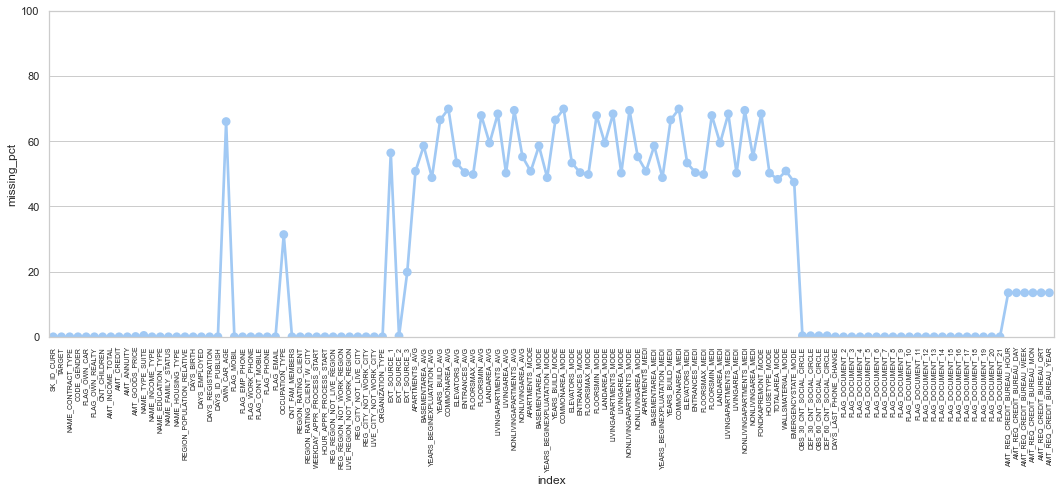

In [10]:
plt.figure(figsize=(18,6))
sns.pointplot(y='missing_pct', x='index', data=missing_data)
plt.xticks(rotation =90, fontsize=7)
plt.ylim((0,100))
plt.show()

In [11]:
display_formatted_features_missing_pct(application_train)

Feature: SK_ID_CURR                    Percent of missing data: 0.0
Feature: TARGET                        Percent of missing data: 0.0
Feature: NAME_CONTRACT_TYPE            Percent of missing data: 0.0
Feature: CODE_GENDER                   Percent of missing data: 0.0
Feature: FLAG_OWN_CAR                  Percent of missing data: 0.0
Feature: FLAG_OWN_REALTY               Percent of missing data: 0.0
Feature: CNT_CHILDREN                  Percent of missing data: 0.0
Feature: AMT_INCOME_TOTAL              Percent of missing data: 0.0
Feature: AMT_CREDIT                    Percent of missing data: 0.0
Feature: AMT_ANNUITY                   Percent of missing data: 0.0039022994299390914
Feature: AMT_GOODS_PRICE               Percent of missing data: 0.09040327012692229
Feature: NAME_TYPE_SUITE               Percent of missing data: 0.42014757195677555
Feature: NAME_INCOME_TYPE              Percent of missing data: 0.0
Feature: NAME_EDUCATION_TYPE           Percent of missing data: 0.

We see that a lot of features (around half) has missing values and data missing precentage for big amount of these features exceeds 50%. We will need to deal with these NaN's before modeling.

What about the other datasets?

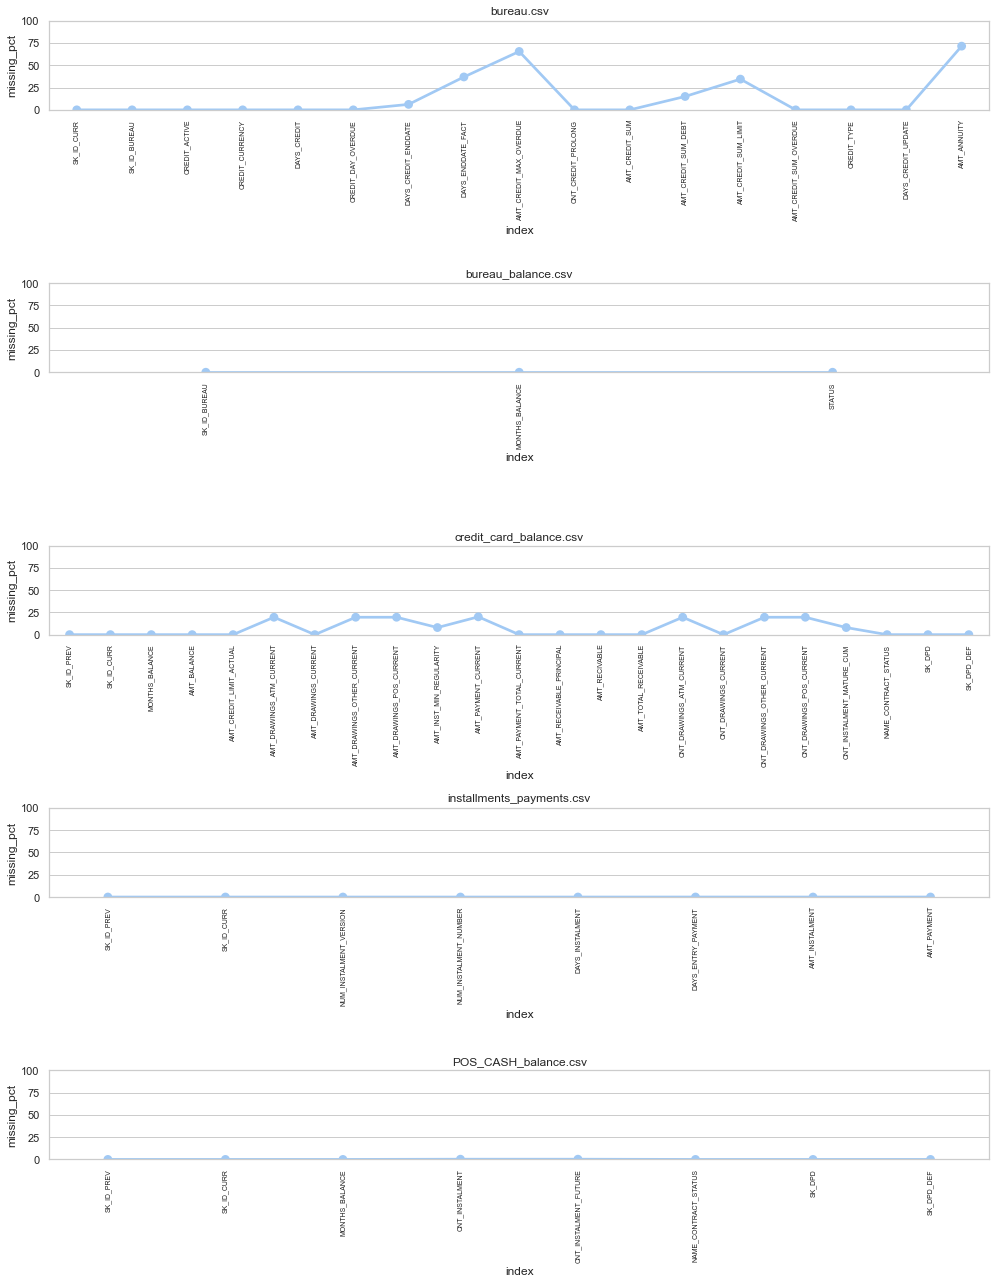

In [12]:
f, ax = plt.subplots(5,1, figsize=(14, 18))

for dataset, ax, name in zip(dfs[2:], ax.flat, os.listdir('./data/')[2:]):
    missing_data = pd.DataFrame({'missing_pct': percentage_of_nulls(dataset)}).reset_index()
    sns.pointplot(y='missing_pct', x='index', data=missing_data, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=7)
    ax.set_title(name)
    ax.set_ylim((0,100))

plt.tight_layout()
plt.show()

Some files does not contain any missing values, while other has, which again, will need to be dealed before making the models.

Let's check our main target variable

In [13]:
application_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

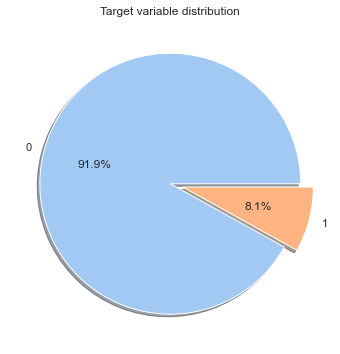

In [14]:
plt.figure(figsize=(6, 6))
application_train['TARGET'].value_counts().plot.pie(
    explode=[0,0.1],
    autopct='%1.1f%%',
    shadow=True)
plt.title('Target variable distribution')
plt.ylabel('')
plt.show()

That's a huge data imbalance. Defaulted loans takes around 8% of all loans. We are gonna need to put some weight on class for  our ML models.

Let's load the descriptions of the main file

In [15]:
pd.read_csv(
    'HomeCredit_columns_description.csv', 
    encoding = "ISO-8859-1",
    usecols=['Row', 'Description']).style.set_properties(subset=['Description'], **{'width': '700px'})

,Row,Description
0,SK_ID_CURR,ID of loan in our sample
1,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)"
2,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving
3,CODE_GENDER,Gender of the client
4,FLAG_OWN_CAR,Flag if the client owns a car
5,FLAG_OWN_REALTY,Flag if client owns a house or flat
6,CNT_CHILDREN,Number of children the client has
7,AMT_INCOME_TOTAL,Income of the client
8,AMT_CREDIT,Credit amount of the loan
9,AMT_ANNUITY,Loan annuity


### ANOMALIES/OUTLIERS DETECTION

#### CATEGORICAL FEATURES

How many different categories the categorical features has?

In [16]:
object_cols = application_train.select_dtypes(["object"]).columns
application_train.select_dtypes(["object"]).apply(pd.Series.nunique)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

Plot them to see is there any misspelled categories

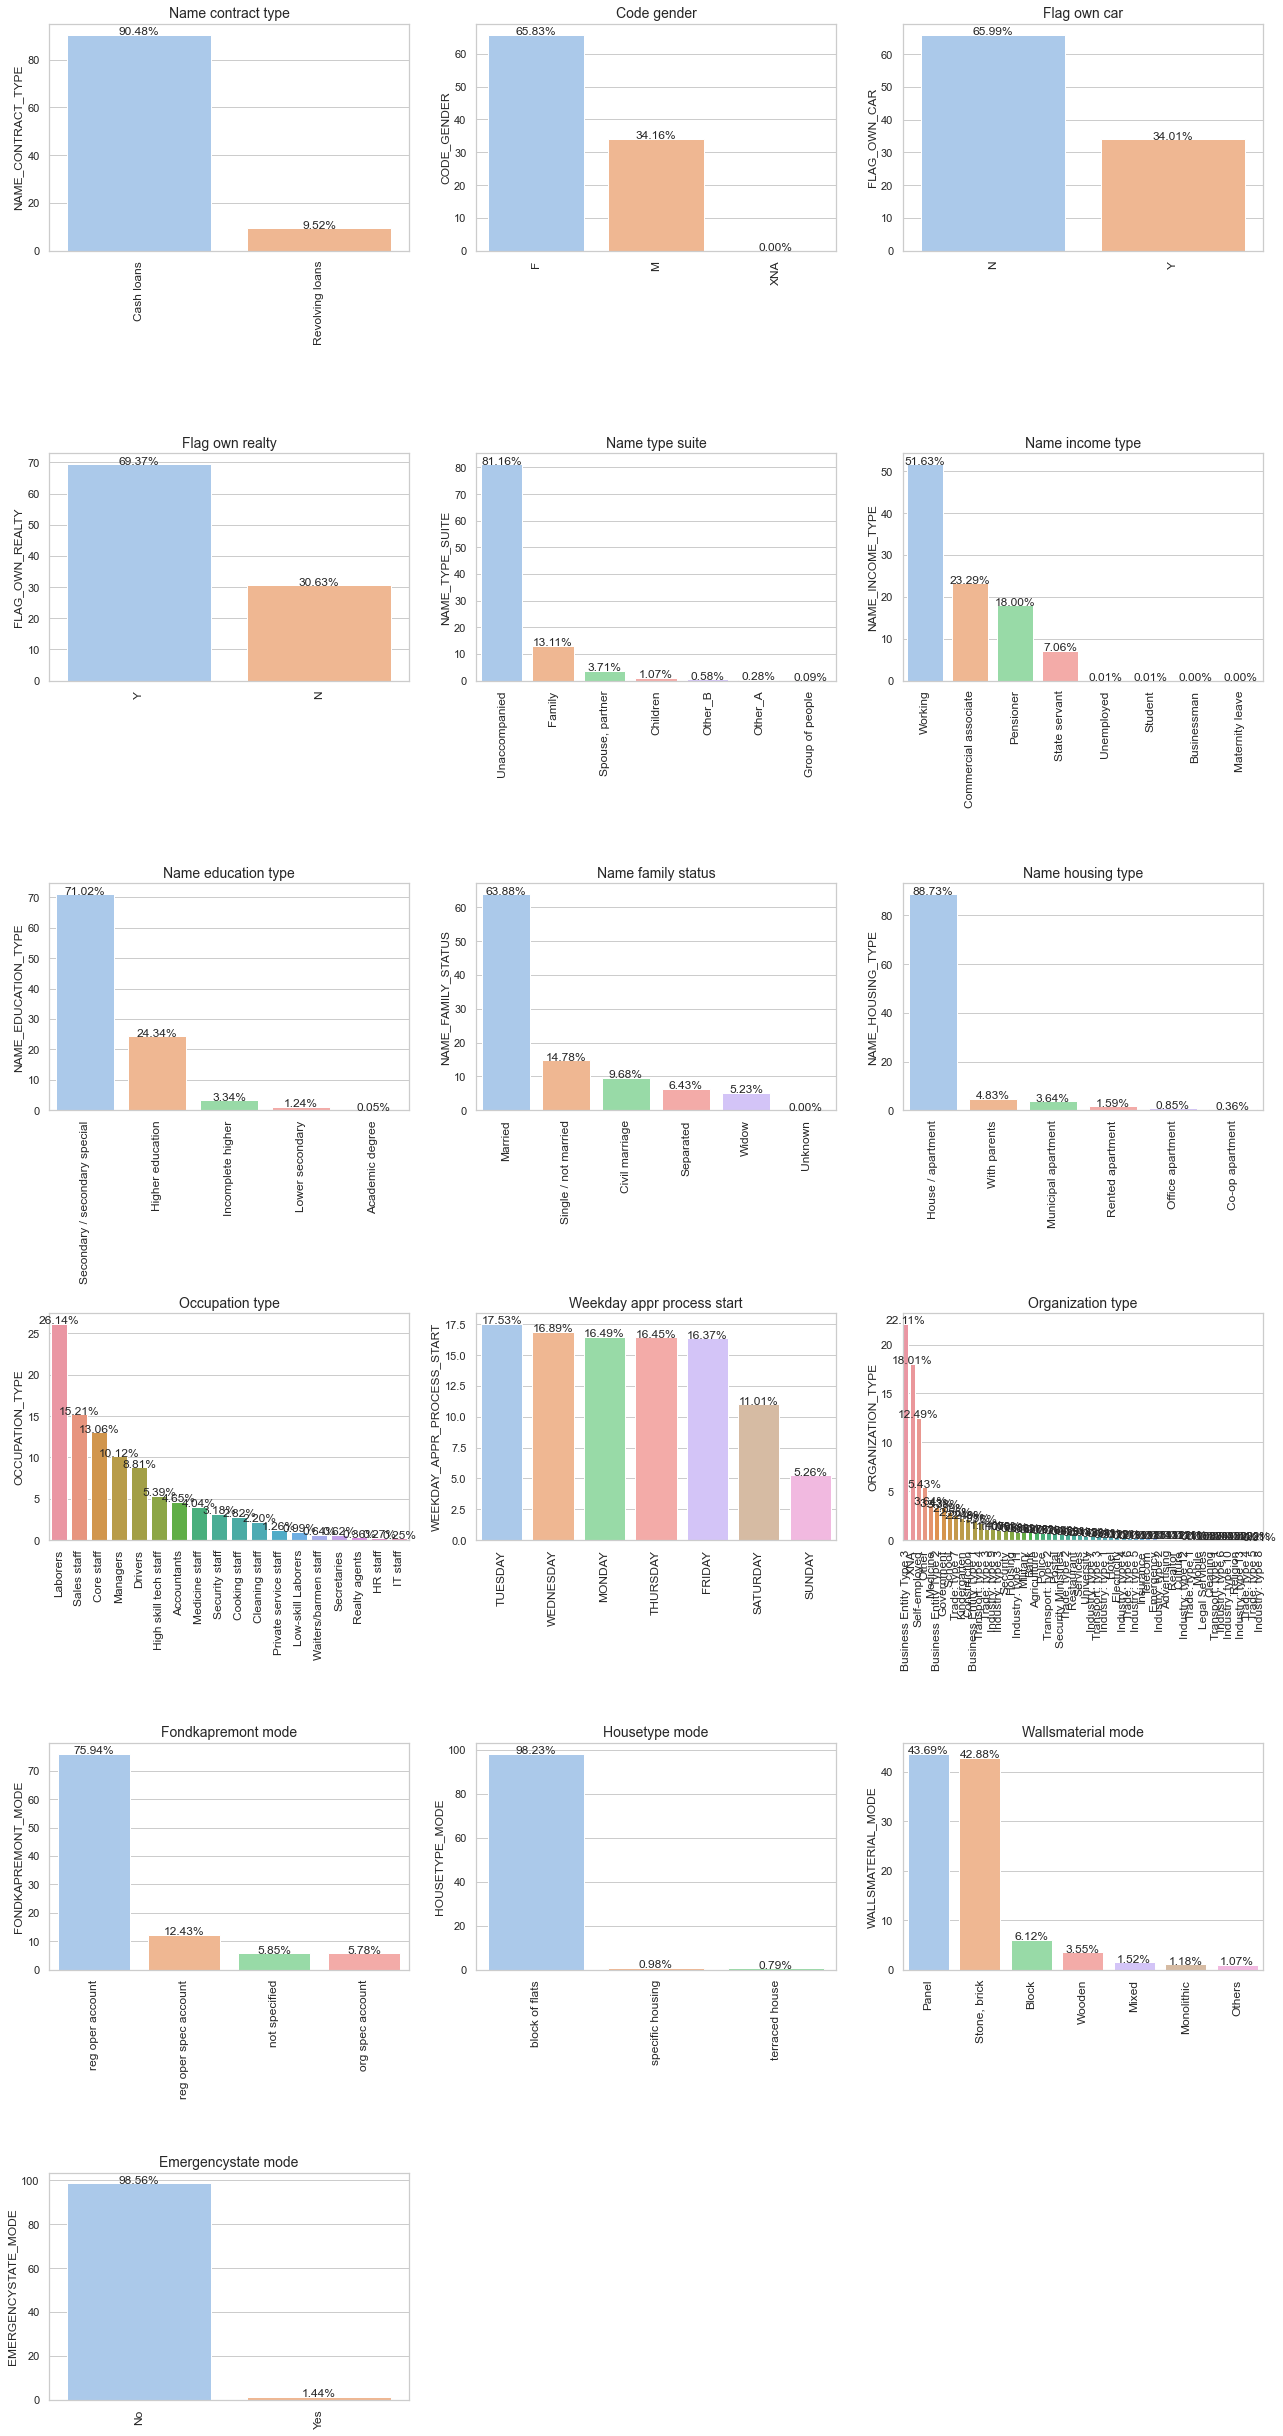

In [17]:
f, ax = plt.subplots(6,3, figsize=(18, 34))
f.delaxes(ax[5][1])
f.delaxes(ax[5][2])

data = application_train[object_cols]
features = data.columns

for feat, ax in zip(features, ax.flat):
    values = pd.DataFrame(data[feat].value_counts(normalize=True)*100.0)
    graph = sns.barplot(y=feat, x=values.index, data=values, ax=ax)
    ax.bar_label(ax.containers[0], padding=-2, fmt='%.2f%%')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=12)
    ax.set_title(' '.join(feat.split('_')).capitalize(), fontsize=14)

plt.tight_layout()

From quick look we see that it seems there are no gibberish entries in categorical features except `code_gender` has a very small amount of 'XNA' values, which means that data is not available.

In [18]:
application_train['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

There are only 4 cases in total. Since we will encode our categorical values later on and to avoid having separate category and lower possible confuse, let's just drop those instances.

In [19]:
application_train.drop(application_train[application_train['CODE_GENDER'] == "XNA"].index, inplace=True)

#### CONTINUOUS/DISCRETE FEATURES (INT64)

In [22]:
int64_cols = application_train.select_dtypes(["int64"]).columns

In [23]:
application_train[int64_cols].describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
count,307507.000000,307507.00000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.00000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000
mean,278181.527256,0.08073,0.417047,-16037.027271,63815.929208,-2994.201670,0.999997,0.819887,0.199358,0.998133,0.281057,0.056721,2.052461,2.031518,12.063394,0.015144,0.050770,0.040659,0.078174,0.230457,0.179557,0.000042,0.710033,0.000081,0.015115,0.088057,0.000192,0.081377,0.003896,0.000023,0.003912,0.000007,0.003525,0.002937,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335
std,102790.132982,0.27242,0.722119,4363.982424,141276.472519,1509.454566,0.001803,0.384282,0.399518,0.043164,0.449516,0.231308,0.509034,0.502737,3.265835,0.122127,0.219527,0.197500,0.268445,0.421126,0.383819,0.006502,0.453748,0.009016,0.122011,0.283378,0.013850,0.273414,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.03476,0.099145,0.016328,0.089799,0.024388,0.022518,0.018299
min,100002.000000,0.00000,0.000000,-25229.000000,-17912.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189146.500000,0.00000,0.000000,-19682.000000,-2760.000000,-4299.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278203.000000,0.00000,0.000000,-15750.000000,-1213.000000,-3254.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,367143.500000,0.00000,1.000000,-12413.000000,-289.000000,-1720.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000,2.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,456255.000000,1.00000,19.000000,-7489.000000,365243.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000

It is seen that we have much more of categorical features (values of only 0 and 1) even their type are **int64**. So we are going to change type of these columns. First, let get a list of such features

In [24]:
new_categoricals = get_features_of_zeros_ones(application_train, int64_cols)
new_categoricals

['TARGET',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [25]:
change_type_to_categorical(application_train, new_categoricals[1:])

In [26]:
application_train.dtypes.value_counts()

float64     65
category    32
object      16
int64        9
dtype: int64

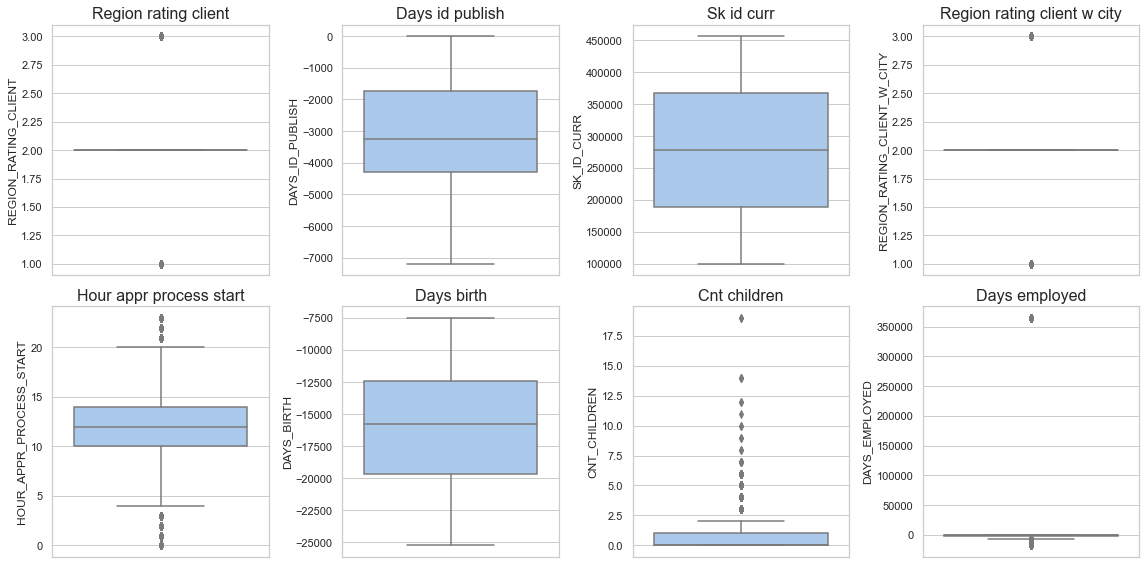

In [27]:
# plotting only continuous/discrete features
columns = list(set(int64_cols) - set(new_categoricals))

fig, axes = plt.subplots(2,4, figsize=(16,8))

for col, ax in zip(columns, axes.flat):
    sns.boxplot(y=application_train[col], ax=ax)
    ax.set_title(' '.join(col.split('_')).capitalize(), fontsize=16)

plt.tight_layout()

Days of birth are negative numbers. That is client's age in days at the time of application (days born before application). It is quite hard for a human to understand the amount of days so let's convert it to years and check if there any ridiculous values.

In [28]:
application_train['AGE'] = (application_train['DAYS_BIRTH'] / -365).astype('int64')

In [29]:
application_train['AGE'].describe()

count    307507.000000
mean         43.436055
std          11.954577
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: AGE, dtype: float64

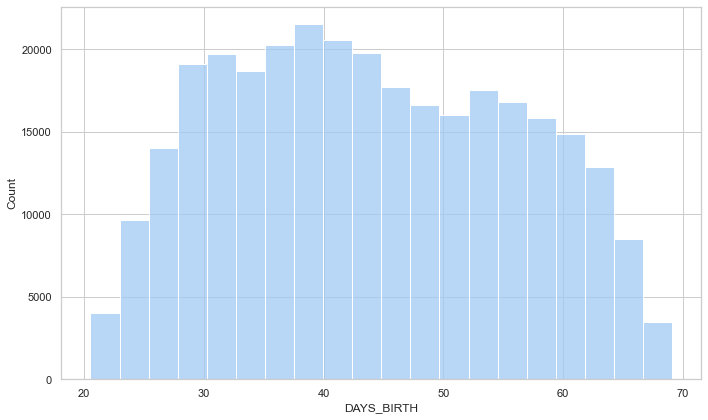

In [30]:
plt.figure(figsize=(10,6))
sns.histplot(data=application_train['DAYS_BIRTH'] / -365, bins=20)
plt.tight_layout()

It seems everything is good with the values. There are no extremely low (young age) or high (old age)

But there are definitely some wrong values in `DAYS_EMPLOYED`. Let's examine

In [31]:
application_train[application_train['DAYS_EMPLOYED'] > 0]['DAYS_EMPLOYED'].value_counts()

365243    55374
Name: DAYS_EMPLOYED, dtype: int64

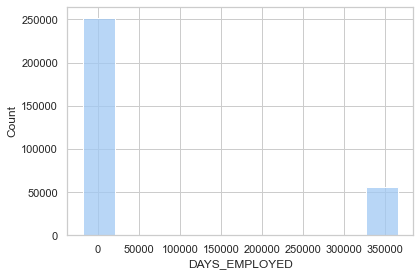

In [32]:
sns.histplot(x='DAYS_EMPLOYED', data=application_train, bins=10)
plt.tight_layout()

There are more than 50k clients whose number of days employed is a positive number of 365243.

365243 / 365 ≈ 1000 years which is ridiculous. Most likely this number doesn't marks days, but rather a group of people. Let's check what are the age and type of income of these clients

In [33]:
age_of_anomalies = application_train[application_train['DAYS_EMPLOYED'] > 0]
age_of_anomalies['DAYS_BIRTH'] = age_of_anomalies['DAYS_BIRTH']/-365

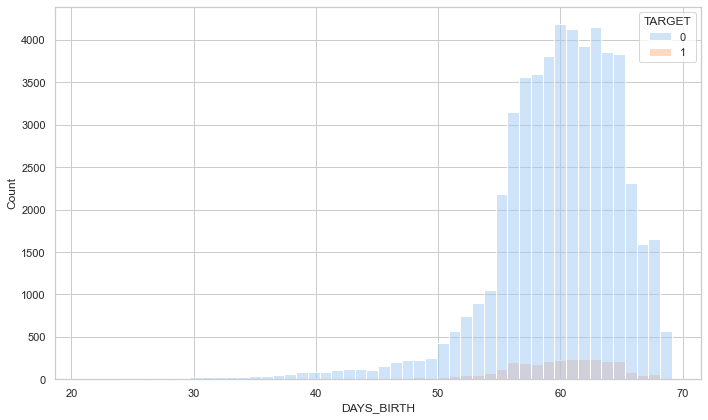

In [34]:
plt.figure(figsize=(10,6))
sns.histplot(x='DAYS_BIRTH', data=age_of_anomalies, bins=50, hue='TARGET')
plt.tight_layout()

In [35]:
age_of_anomalies['NAME_INCOME_TYPE'].value_counts()

Pensioner     55352
Unemployed       22
Name: NAME_INCOME_TYPE, dtype: int64

Eventualy we see that these are unemployed clients whose majority are pensioners and only very few of them are actually unemployed.

So if we exclude this group, how would the distribution of `DAYS_EMPLOYED` for the remaining clients look like?

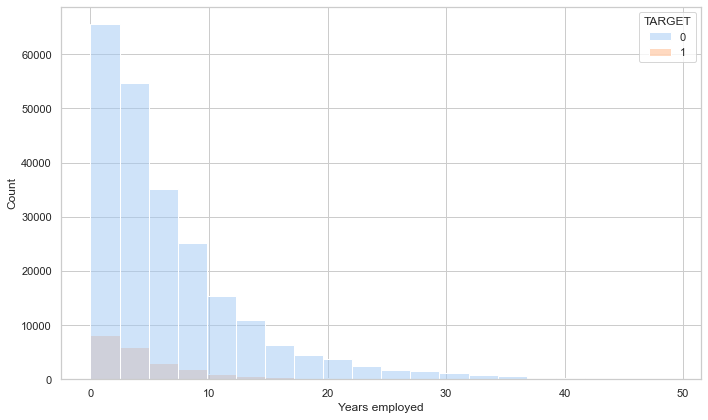

In [36]:
plt.figure(figsize=(10,6))

data = application_train[application_train['DAYS_EMPLOYED'] != 365243]
data['DAYS_EMPLOYED'] = data['DAYS_EMPLOYED']/-365

sns.histplot(x='DAYS_EMPLOYED', data=data, bins=20, hue='TARGET')
plt.xlabel('Years employed')
plt.tight_layout()

So to conclude, every 6'th client here is Pensioner. Just a quick peek how do they perform by means of repaid/defaulted loan.

In [37]:
empl_vs_unempl_comp = pd.Series([(application_train[application_train['NAME_INCOME_TYPE'] != 'Pensioner']['TARGET'].value_counts(normalize=True)*100)[1],
                           (application_train[application_train['NAME_INCOME_TYPE'] == 'Pensioner']['TARGET'].value_counts(normalize=True)*100)[1]])

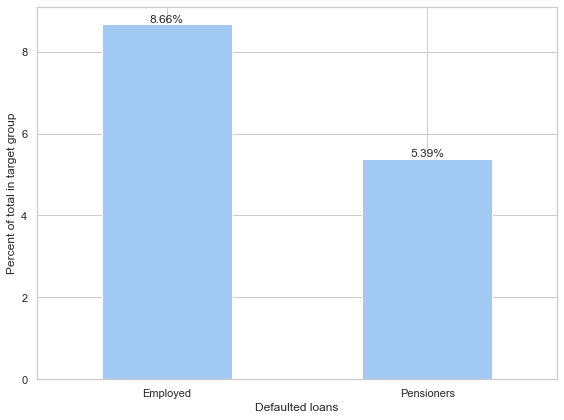

In [38]:
plt.figure(figsize=(8,6))
x_labels = ['Employed', 'Pensioners']
ax = empl_vs_unempl_comp.plot(kind='bar')
ax.set_xlabel('Defaulted loans')
ax.set_ylabel('Percent of total in target group')
ax.set_xticklabels(x_labels, rotation=0)
ax.bar_label(ax.containers[0], fmt='%.2f%%', fontsize=12)
plt.tight_layout()

Well, that is really interesting to see! Pensioners has much more less defaulted loans than regulary employed. They are suposedly better clients. This could be explained as with Pensioners gains steady income while income of others depends on many reasons.

#### CONTINUOUS/DISCRETE FEATURES (FLOAT64)

In [40]:
float64_cols = application_train.select_dtypes(["float64"]).columns

In [41]:
float64_cols

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'OWN_CAR_AGE',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI'

In [42]:
application_train[float64_cols]

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,OWN_CAR_AGE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,202500.0,406597.5,24700.5,351000.0,0.018801,-3648.0,NaN,1.0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,0.0149,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,270000.0,1293502.5,35698.5,1129500.0,0.003541,-1186.0,NaN,2.0,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,0.0714,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,67500.0,135000.0,6750.0,135000.0,0.010032,-4260.0,26.0,1.0,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,135000.0,312682.5,29686.5,297000.0,0.008019,-9833.0,NaN,2.0,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,121500.0,513000.0,21865.5,513000.0,0.028663,-4311.0,NaN,1.0,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,157500.0,254700.0,27558.0,225000.0,0.032561,-8456.0,NaN,1.0,0.145570,0.681632,NaN,0.2021,0.0887,0.9876,0.8300,0.0202,0.22,0.1034,0.6042,0.2708,0.0594,0.1484,0.1965,0.0753,0.1095,0.1008,0.0172,0.9782,0.7125,0.0172,0.0806,0.0345,0.4583,0.0417,0.0094,0.0882,0.0853,0.0,0.0125,0.2040,0.0887,0.9876,0.8323,0.0203,0.22,0.1034,0.6042,0.2708,0.0605,0.1509,0.2001,0.0757,0.1118,0.2898,0.0,0.0,0.0,0.0,-273.0,NaN,NaN,NaN,NaN,NaN,NaN
307507,72000.0,269550.0,12001.5,225000.0,0.025164,-4388.0,NaN,1.0,NaN,0.115992,NaN,0.0247,0.0435,0.9727,0.6260,0.0022,0.00,0.1034,0.0833,0.1250,0.0579,0.0202,0.0257,0.0000,0.0000,0.0252,0.0451,0.9727,0.6406,0.0022,0.0000,0.1034,0.0833,0.1250,0.0592,0.0220,0.0267,0.0,0.0000,0.0250,0.0435,0.9727,0.6310,0.0022,0.00,0.1034,0.0833,0.1250,0.0589

Let's take a look at the data distribution for the first 4 features, which from my point of view are important nad  may hold a  lot of outliers

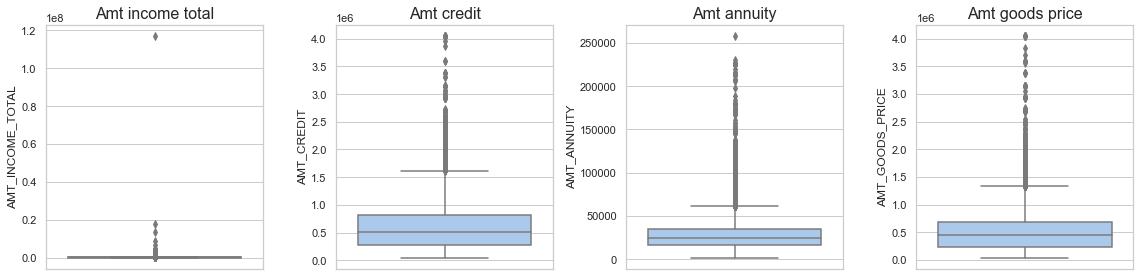

In [43]:
columns = float64_cols[:4]

fig, axes = plt.subplots(1,4, figsize=(16,4))

for col, ax in zip(columns, axes.flat):
    sns.boxplot(y=application_train[col], ax=ax)
    ax.set_title(' '.join(col.split('_')).capitalize(), fontsize=16)

plt.tight_layout()

As expected, there are a lot of outliers and we don't want it to influence modeling. We may deal with it by using $1.5·IQR$ rule.

In [44]:
# We'll make a copy of dataset first
app_train_copy = application_train.copy()

In [45]:
# Drop rows with outliers detected
app_train_copy = app_train_copy.drop(num_of_outliers(app_train_copy, ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY'], 1), axis = 0).reset_index(drop=True)

Let's visualise to see the result

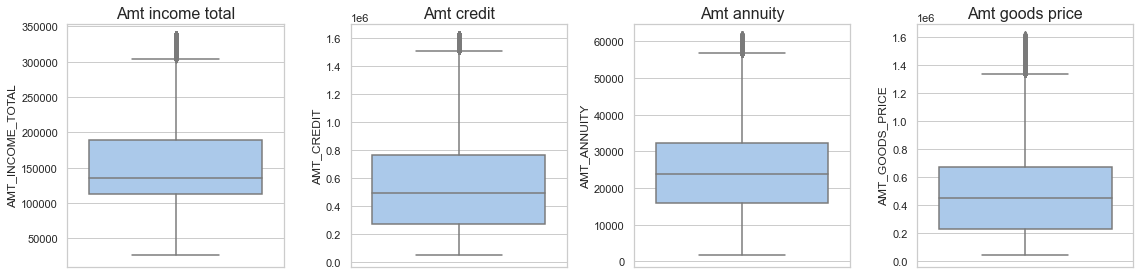

In [46]:
columns = float64_cols[:4]

fig, axes = plt.subplots(1,4, figsize=(16,4))

for col, ax in zip(columns, axes.flat):
    sns.boxplot(y=app_train_copy[col], ax=ax)
    ax.set_title(' '.join(col.split('_')).capitalize(), fontsize=16)

plt.tight_layout()

Let's check what is the data loss

In [47]:
dataset_shrink(application_train, app_train_copy)

'7.25%'

That is a loss we can live with. We can move on to the exploratory data analysis.

### EDA + FEATURE ENGINEERING

Since our main target is to predict defaulted loan, we'll do some exploratory insights for various features dividing them with target variable.

At the begining we'll make few new temporary columns with labels of some binary categories for our convenience to use in plots

In [48]:
# gender labeling
app_train_copy['GENDER'] = app_train_copy['CODE_GENDER'].apply(lambda row: make_label(row, 'Male', "Female"))

In [49]:
# target value labeling
app_train_copy['LOAN_STATUS'] = app_train_copy['TARGET'].apply(lambda row: make_label(row, 'Defaulted loan', "Repaid loan"))

First group clients by the gender.

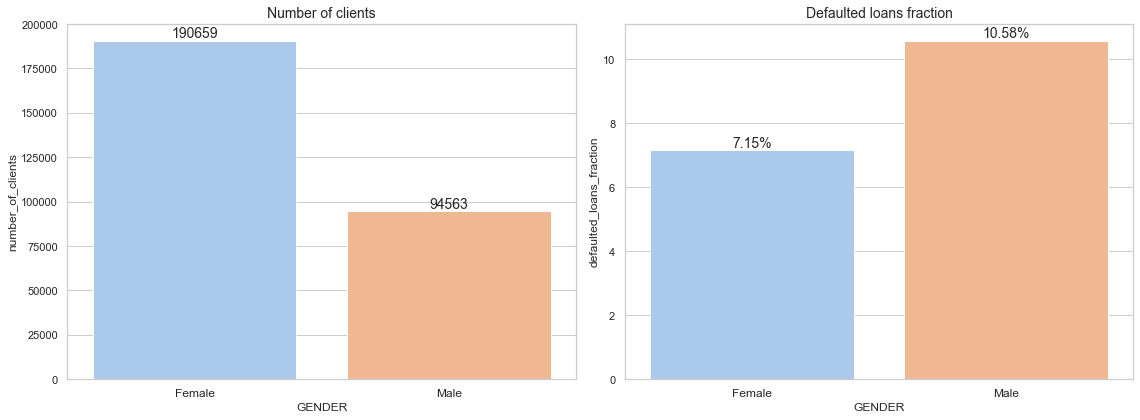

In [50]:
fraction_of_group_to_target(app_train_copy, 'GENDER')

There are much more female clients (more than double) in a dataset than males, but loans of male clients are more often defaulted.

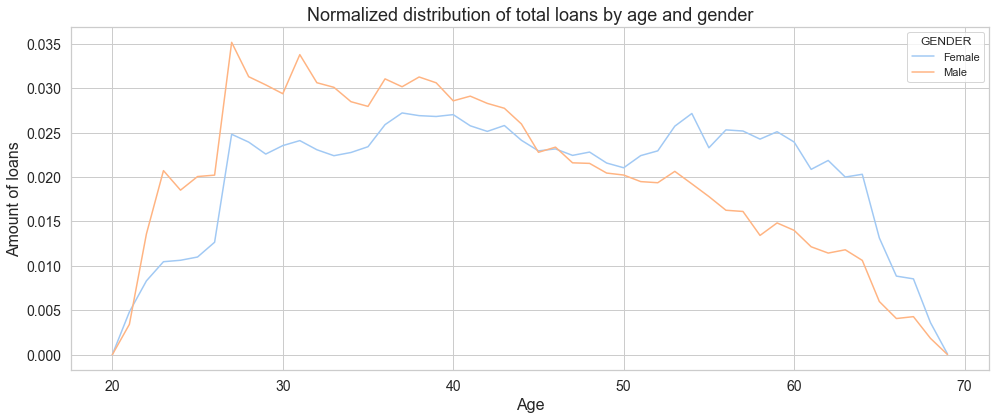

In [51]:
pd.crosstab(
    index=app_train_copy['AGE'], 
    columns=[app_train_copy['GENDER']],
    values=app_train_copy['TARGET'],
    aggfunc='count', 
    normalize='columns').plot(figsize=(14,6))
title_and_labels(
    title='Normalized distribution of total loans by age and gender',
    x_label='Age',
    y_label='Amount of loans')
plt.tight_layout()

Here you can see the gender difference in the number of loans taken out. The female group with small deviations borrows roughly equally across a wide age range, while the male group gradually decreases starting from the age of 38-40 years.

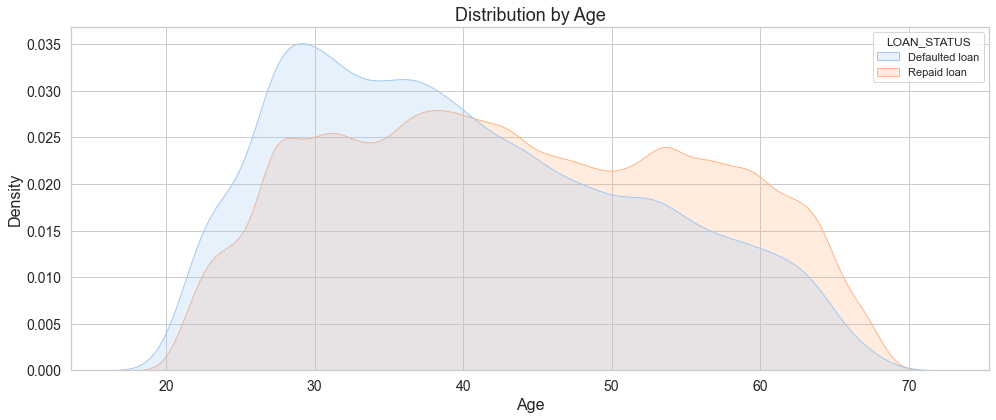

In [52]:
plt.figure(figsize=(14,6))
sns.kdeplot(x='AGE', data=app_train_copy, common_norm=False, hue='LOAN_STATUS', shade=True)
title_and_labels(
    title='Distribution by Age', x_label='Age', y_label='Density')
plt.tight_layout()

In general, young customers are more likely to have difficulties repaying their loan

We can label the age by tens of years and see what group tends to have most defaulted loans

In [53]:
app_train_copy['AGE_LABELS'] = pd.cut(x=app_train_copy['AGE'], bins=5, labels=['20s', '30s', '40s', '50s', '60s']).sort_values()

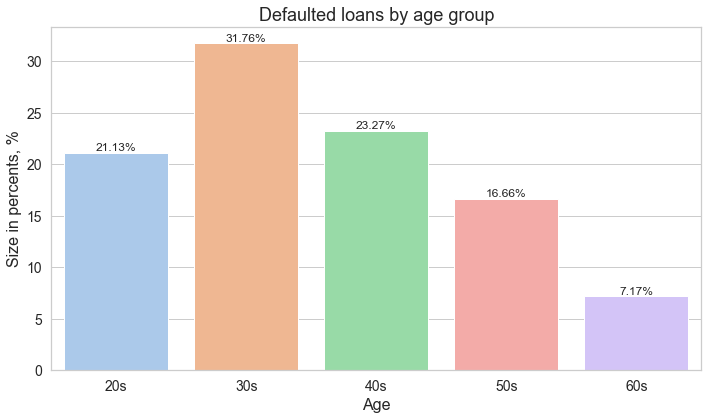

In [54]:
plt.figure(figsize=(10, 6))
values = pd.DataFrame(app_train_copy[app_train_copy['TARGET'] == 1]['AGE_LABELS'].value_counts(normalize=True)*100.0)
graph = sns.barplot(y='AGE_LABELS', x=values.index, data=values)
graph.bar_label(graph.containers[0], fmt='%.2f%%')
title_and_labels(
    title='Defaulted loans by age group', x_label='Age', y_label='Size in percents, %')
plt.tight_layout()

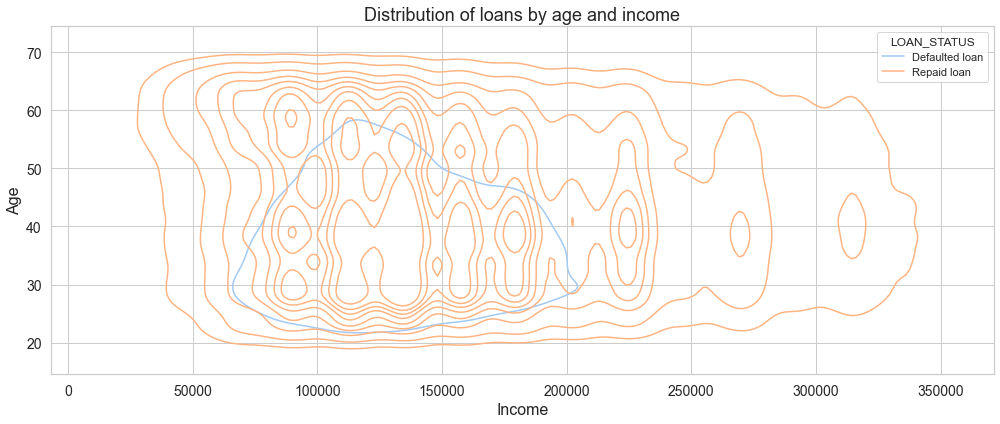

In [188]:
plt.figure(figsize=(14,6))
sns.kdeplot(data=app_train_copy, x="AMT_INCOME_TOTAL", y="AGE", hue="LOAN_STATUS")
title_and_labels(
    title='Distribution of loans by age and income', x_label='Income', y_label='Age')
plt.tight_layout()

By adding the amount of income we could notice the main group of clients that has defaulted loans. On average it would be a client around 40 years old with a average income of ~145000

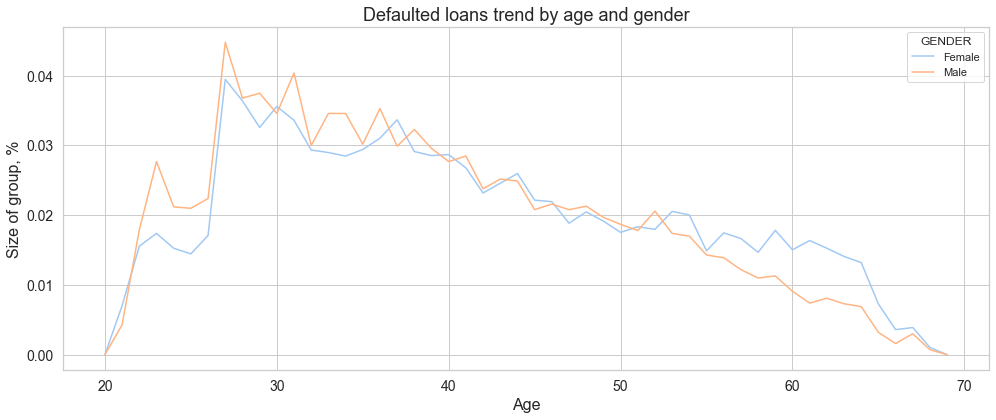

In [58]:
pd.crosstab(
    index=app_train_copy['AGE'], 
    columns=[app_train_copy['GENDER']],
    values=app_train_copy['TARGET'],
    aggfunc='sum', 
    normalize='columns').plot(figsize=(14,6))
title_and_labels(
    title='Defaulted loans trend by age and gender',
    x_label='Age',
    y_label='Size of group, %')
plt.tight_layout()

Eventhough a fraction of male clients with defaulted loans is bigger than female, but with minor exceptions the trend of defaulted loans by age for both genders are similar

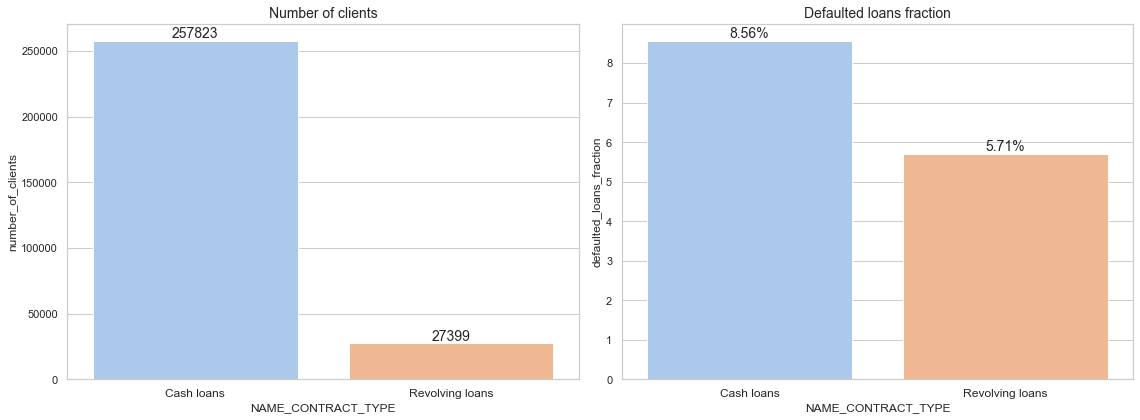

In [59]:
fraction_of_group_to_target(app_train_copy, 'NAME_CONTRACT_TYPE')

The majority of loans are cash loans as well as more of them are defaulted

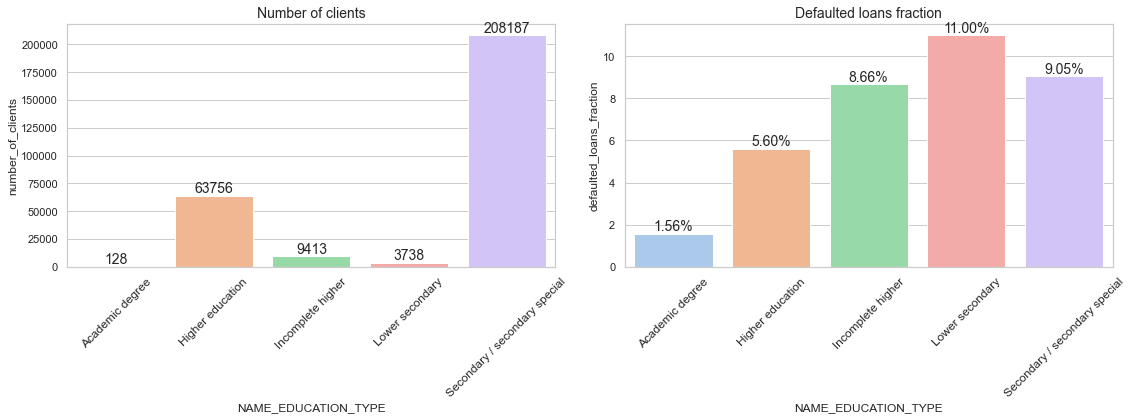

In [61]:
fraction_of_group_to_target(app_train_copy, 'NAME_EDUCATION_TYPE', 45)

As could be expected in advance, the lower the education degree the client has, the higher are chances of a bad loan.

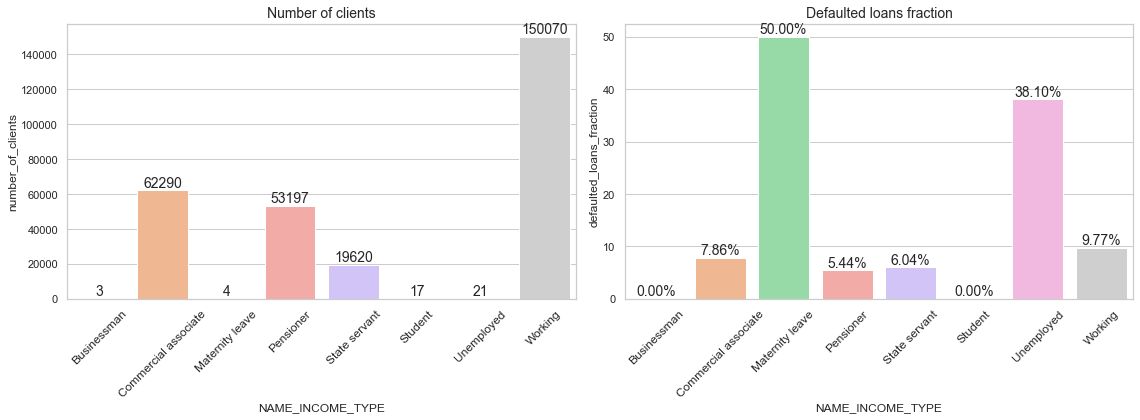

In [62]:
fraction_of_group_to_target(app_train_copy, 'NAME_INCOME_TYPE', 45)

We have some very small groups of clients with certain income type, thus it would be difficult to draw statistical conclusions for these particular groups. Nevertheless, it is of course logical to conclude that the unemployed have difficulties repaying their loans.

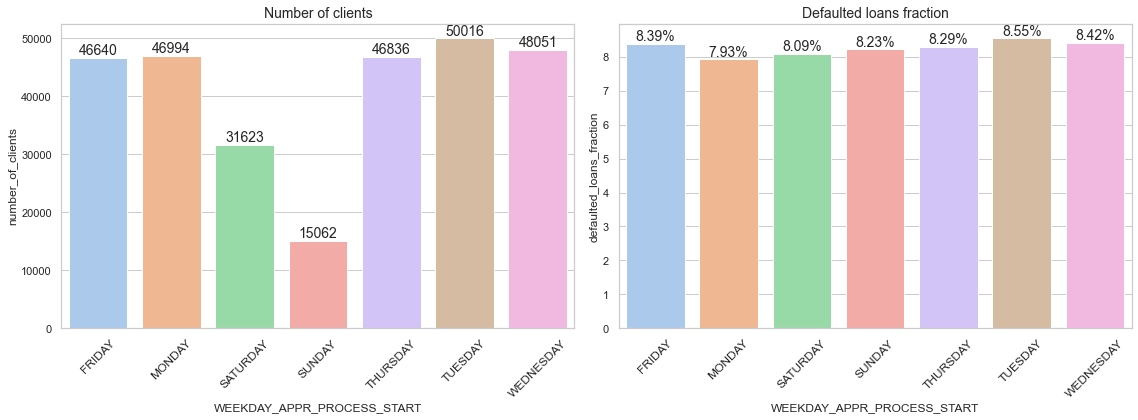

In [63]:
fraction_of_group_to_target(app_train_copy, 'WEEKDAY_APPR_PROCESS_START', 45)

Here we can see the names of weekdays that customers have applied for a loan. If we look at the statistics in a slightly more entertaining way, we could conclude that Mondays are the best day to apply for a loan and Tuesday is the worst.

There are some external information provided in this dataset. `EXT_SOURCE_1`, `EXT_SOURCE_2`, and `EXT_SOURCE_3`. Description says it is "normalized score from external data source", while it is unknown what data it consist of. Let's see if there is any correlation with the target variable.

In [64]:
app_train_copy[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'TARGET']].sample()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,TARGET
256260,0.872821,0.789513,NaN,0


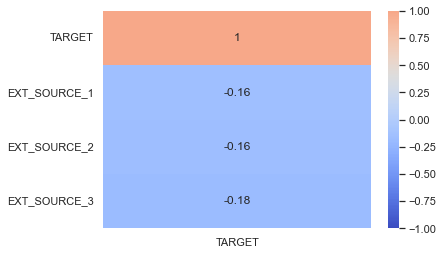

In [65]:
plt.figure(figsize=(6,4))
columns = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'TARGET']
sns.heatmap(app_train_copy[columns].corr()[['TARGET']].sort_values(by='TARGET', ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm', center=0.4)
plt.show()

A rather weak negative correlation (the larger the value - the more likely loan will be repaid) with the target variable.

What about the distribution?

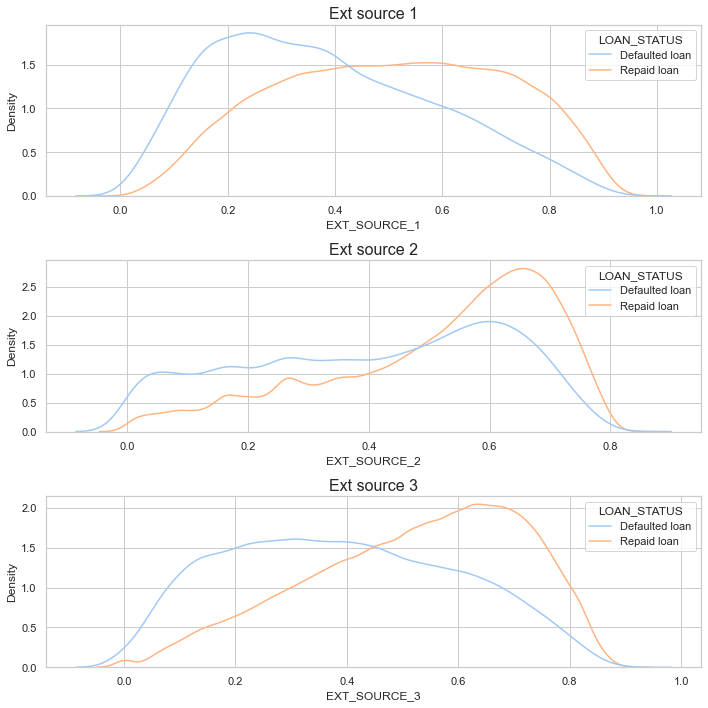

In [66]:
columns = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']

fig, axes = plt.subplots(3, 1, figsize=(10, 10))

for col, ax in zip(columns, axes.flat):
    sns.kdeplot(x=col, data=app_train_copy, hue='LOAN_STATUS', common_norm=False, ax=ax)
    ax.set_title(' '.join(col.split('_')).capitalize(), fontsize=16)

plt.tight_layout()

From these plots you may clearly see sucessfully repaid loans are with larger value of these features. These could be one of the most important features for our model. It is seen as well that `EXT_SOURCE_3` is basically mirrored `EXT_SOURCE_1`.

*`EXT_SOURCE_1` features has almost 60% of missing data, while `EXT_SOURCE_3` around 19%, so we'll likely to drop `EXT_SOURCE_1` column.*

Numerical features can often benefit from transformations. Log transformation, **np.log(1 + x)**, is a strong transformation that is particularly helpful when a feature observes a power-law relationship, or when there’s a long tail in the outliers distribution.

[Source](https://towardsdatascience.com/feature-engineering-for-machine-learning-a80d3cdfede6)

Let's try to make transformation to `EXT_SOURCE_3` feature

In [68]:
app_train_copy['EXT_SOURCE_3_LOG'] = np.log(1 + app_train_copy['EXT_SOURCE_3'])

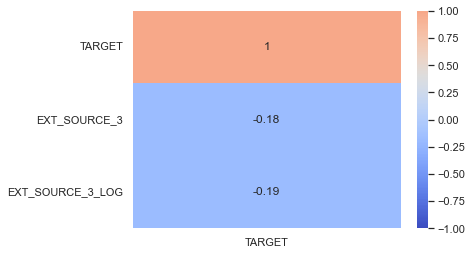

In [69]:
plt.figure(figsize=(6,4))
columns = ['EXT_SOURCE_3_LOG', 'EXT_SOURCE_3', 'TARGET']
sns.heatmap(app_train_copy[columns].corr()[['TARGET']].sort_values(by='TARGET', ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm', center=0.4)
plt.show()

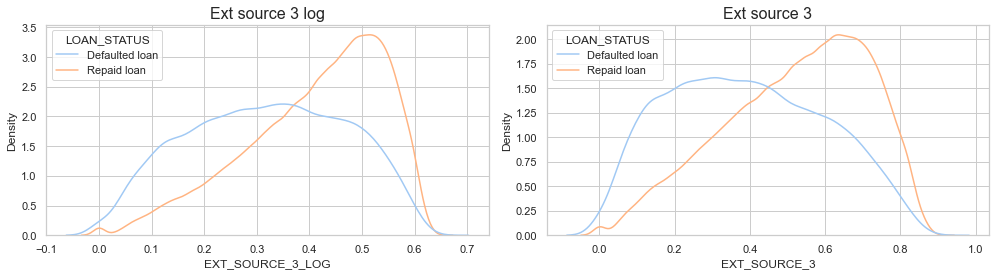

In [70]:
columns = ['EXT_SOURCE_3_LOG', 'EXT_SOURCE_3']

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

for col, ax in zip(columns, axes.flat):
    sns.kdeplot(x=col, data=app_train_copy, hue='LOAN_STATUS', common_norm=False, ax=ax)
    ax.set_title(' '.join(col.split('_')).capitalize(), fontsize=16)

plt.tight_layout()

We succeeded to get slightly higher correlation!

In order try to help our future ML model we may create new features using the existing ones:

`Loan-to-value` ratio, `income_to_annuity` ratio, `income_to_credit` ratio, `teoretical_credit_term`

In [71]:
app_train_copy['LOAN_TO_VALUE'] = app_train_copy['AMT_CREDIT']/app_train_copy['AMT_GOODS_PRICE']
app_train_copy['INCOME_TO_ANNUITY'] = app_train_copy['AMT_ANNUITY']/app_train_copy['AMT_INCOME_TOTAL']
app_train_copy['INCOME_TO_CREDIT'] = app_train_copy['AMT_INCOME_TOTAL']/app_train_copy['AMT_CREDIT']
app_train_copy['TERM'] = app_train_copy['AMT_CREDIT']/app_train_copy['AMT_ANNUITY']

Let's analyse the income of the clients.

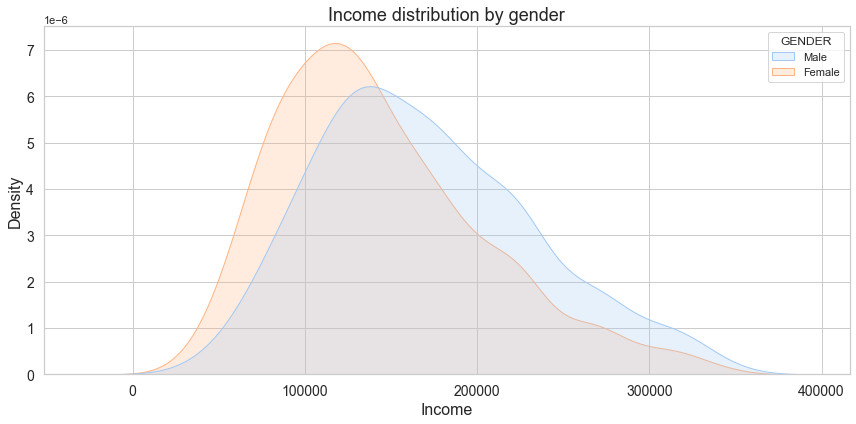

In [160]:
plt.figure(figsize=(12,6))
income_kde = sns.kdeplot(x='AMT_INCOME_TOTAL', data=app_train_copy, hue='GENDER', bw_adjust=3, common_norm=False, shade=True)
title_and_labels(
    title='Income distribution by gender', x_label='Income', y_label='Density')
plt.tight_layout()

It may be noticed that more women are on lower incomes.

Below we'll make some income categories and labels

In [73]:
app_train_copy['INCOME_BINS'] = pd.DataFrame(pd.cut(x=app_train_copy['AMT_INCOME_TOTAL'], bins=14))
app_train_copy['INCOME_LABELS'] = pd.DataFrame(pd.cut(x=app_train_copy['AMT_INCOME_TOTAL'], bins=14, labels=range(1,15)))

In [74]:
pd.DataFrame({
    'income_range':app_train_copy['INCOME_BINS'].unique(), 
    'income_label':app_train_copy['INCOME_LABELS'].unique()}).sort_values(by='income_label')

,income_range,income_label
6,"(25338.15, 47925.0]",1
2,"(47925.0, 70200.0]",2
9,"(70200.0, 92475.0]",3
4,"(92475.0, 114750.0]",4
3,"(114750.0, 137025.0]",5
8,"(137025.0, 159300.0]",6
5,"(159300.0, 181575.0]",7
0,"(181575.0, 203850.0]",8
7,"(203850.0, 226125.0]",9
12,"(226125.0, 248400.0]",10


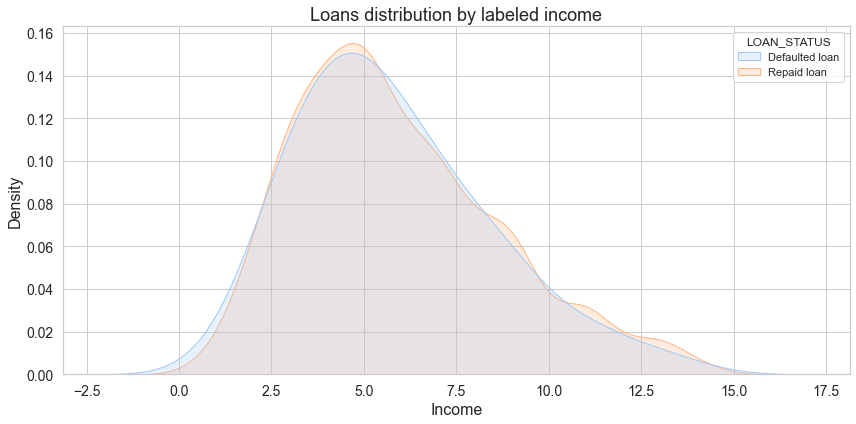

In [159]:
plt.figure(figsize=(12,6))
sns.kdeplot(x='INCOME_LABELS', data=app_train_copy, hue='LOAN_STATUS', bw_adjust=3, common_norm=False, shade=True)
title_and_labels(
    title='Loans distribution by labeled income', x_label='Income', y_label='Density')
plt.tight_layout()

There is no big difference in distribution of repaid loans and defaulted ones taking in mind the amount of income.

There are some additional datasets, like *bureau* and *previous_application*. Let's take a look and combine some features with our training data.

In [76]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


We can find out the number of previous loans the customer had and merge the feature with our training data. If customer did not had any loan before - we'll set this value to zero. We'll make as well a binary value of did customer had a loan.

In [77]:
prev_loans = bureau.groupby('SK_ID_CURR', as_index=False)['SK_ID_BUREAU'].count().rename(columns={'SK_ID_BUREAU':'PREV_LOANS'})
app_train_copy = app_train_copy.merge(prev_loans, on='SK_ID_CURR', how='left')
app_train_copy['PREV_LOANS'].fillna(0, inplace=True)

In [78]:
# previous loans labeling
app_train_copy['PREV_LOANS_BIN'] = app_train_copy['PREV_LOANS'].apply(lambda row: make_label(row, 1, 0))

In [79]:
app_train_copy[['SK_ID_CURR', 'PREV_LOANS', 'PREV_LOANS_BIN']].sample(5)

,SK_ID_CURR,PREV_LOANS,PREV_LOANS_BIN
144419,280518,12.0,1
39948,149866,1.0,1
135537,269461,6.0,1
100929,226252,6.0,1
87839,209968,1.0,1


We can find out as well did client had overdues with his previous loans (mark as 1) and for how long (count days) and merge with training data.

In [80]:
prev_overdue = bureau.groupby('SK_ID_CURR', as_index=False)['CREDIT_DAY_OVERDUE'].sum().rename(columns={'CREDIT_DAY_OVERDUE':'PREV_OVERDUE'})
app_train_copy = app_train_copy.merge(prev_overdue, on='SK_ID_CURR', how='left')
app_train_copy['PREV_OVERDUE'].fillna(0, inplace=True)

In [81]:
# previous overdue loans labeling
app_train_copy['PREV_LOANS_OVERDUE_BIN'] = app_train_copy['PREV_OVERDUE'].apply(lambda row: make_label(row, 1, 0))

In [194]:
app_train_copy[['SK_ID_CURR', 'PREV_OVERDUE', 'PREV_LOANS_OVERDUE_BIN']].sample(5)

,SK_ID_CURR,PREV_OVERDUE,PREV_LOANS_OVERDUE_BIN
135943,269963,0.0,0
81992,202635,0.0,0
260238,425138,28.0,1
60457,175608,0.0,0
64860,181101,0.0,0


Let's check the fractions of defaulted loans for these two newly generated features

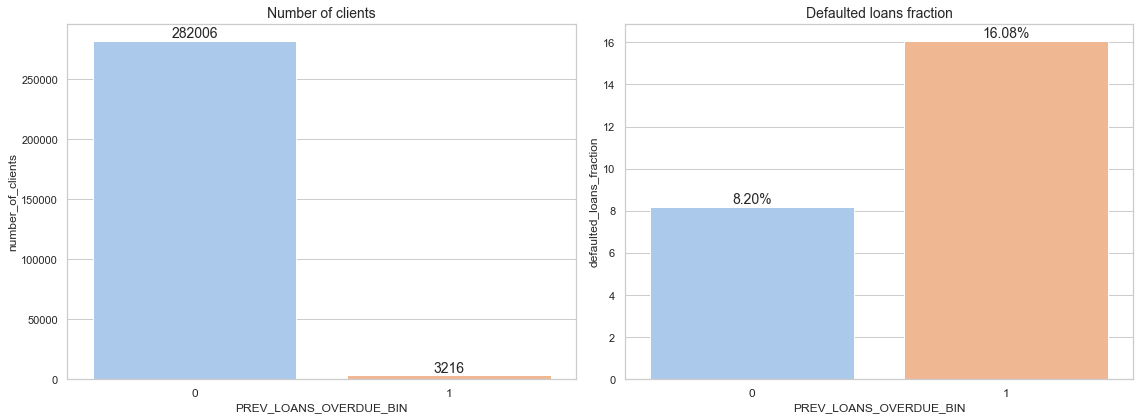

In [83]:
fraction_of_group_to_target(app_train_copy, 'PREV_LOANS_OVERDUE_BIN')

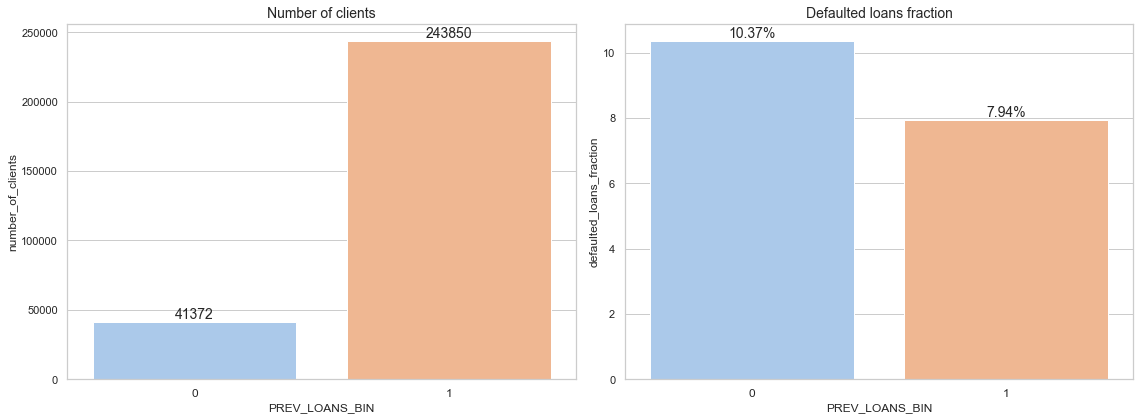

In [84]:
fraction_of_group_to_target(app_train_copy, 'PREV_LOANS_BIN')

Do these newly created features correlate with our target variable?

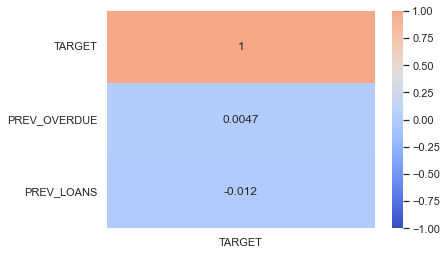

In [85]:
plt.figure(figsize=(6,4))
columns = ['PREV_LOANS', 'PREV_OVERDUE', 'TARGET']
sns.heatmap(app_train_copy[columns].corr()[['TARGET']].sort_values(by='TARGET', ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm', center=0.4)
plt.show()

Well, we can't tell. There is no linear correlation

We'll make some additional features with mean values of numeric *bureau* and *previous_application* features

**Previous applications**:

In [86]:
previous_application_means = previous_application.drop('SK_ID_PREV', axis=1).groupby(['SK_ID_CURR']).agg(['mean']).reset_index()

In [87]:
previous_application_means.sample()

,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
214987,326147,8321.5275,70376.727857,84519.642857,4501.02375,98527.419,11.142857,1.0,0.029558,NaN,NaN,-1062.857143,895.142857,11.0,365243.0,72250.8,72562.8,145585.4,145589.6,0.0


In [88]:
# renaming the columns
previous_application_means.columns = rename_columns(previous_application_means, 'PREV_APP')

In [89]:
# merging with the training data
app_train_copy = app_train_copy.merge(previous_application_means, on='SK_ID_CURR', how='left')

**Bureau**:

In [90]:
bureau_means = bureau.drop('SK_ID_BUREAU', axis=1).groupby(['SK_ID_CURR']).agg(['mean']).reset_index()

In [91]:
bureau_means.sample()

,SK_ID_CURR,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
257807,400338,-2231.666667,0.0,-1605.666667,-1495.0,0.0,0.0,65074.5,0.0,0.0,0.0,-1494.333333,NaN


In [92]:
# renaming the columns
bureau_means.columns = rename_columns(bureau_means, 'BUREAU')

In [93]:
# merging with the training data
app_train_copy = app_train_copy.merge(bureau_means, on='SK_ID_CURR', how='left')

**Credit**:

In [94]:
credit_means = credit_card_balance.drop('SK_ID_PREV', axis=1).groupby(['SK_ID_CURR']).agg(['mean']).reset_index()

In [95]:
credit_means.sample()

,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
53837,285655,-2.5,98462.17125,135000.0,45000.0,33750.0,0.0,0.0,5103.84375,7650.0,5737.5,96339.33,98462.17125,98462.17125,0.333333,0.25,0.0,0.0,1.5,0.0,0.0


In [96]:
# renaming the columns
credit_means.columns = rename_columns(credit_means, 'CREDIT')

In [97]:
# merging with the training data
app_train_copy = app_train_copy.merge(credit_means, on='SK_ID_CURR', how='left')

In [98]:
app_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285222 entries, 0 to 285221
Columns: 188 entries, SK_ID_CURR to CREDIT_SK_DPD_DEF_MEAN
dtypes: category(33), float64(123), int64(13), object(19)
memory usage: 348.4+ MB


Our training dataset has grown from previous 122 features to 184.

Let's quickly check does any of these newly created features has strong correlation with the target variable

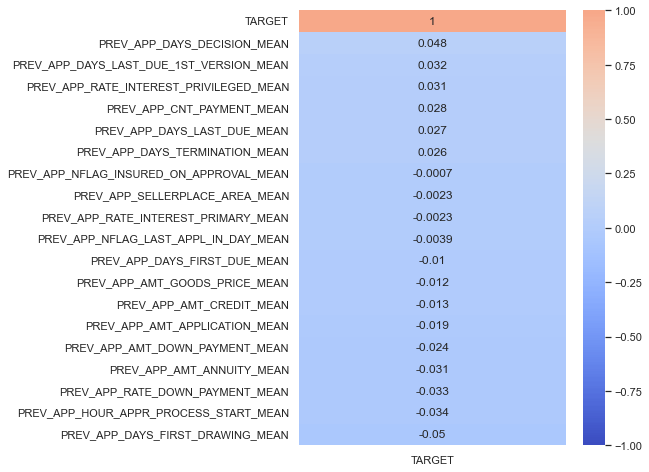

In [99]:
plt.figure(figsize=(6,8))
columns = previous_application_means.columns.tolist()[1:] + ['TARGET']
sns.heatmap(app_train_copy[columns].corr()[['TARGET']].sort_values(by='TARGET', ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm', center=0.4)
plt.show()

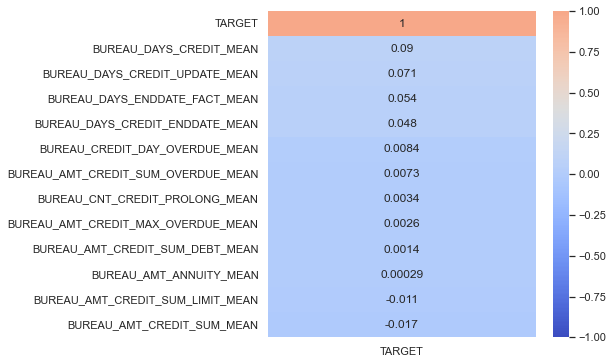

In [100]:
plt.figure(figsize=(6,6))
columns = bureau_means.columns.tolist()[1:] + ['TARGET']
sns.heatmap(app_train_copy[columns].corr()[['TARGET']].sort_values(by='TARGET', ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm', center=0.4)
plt.show()

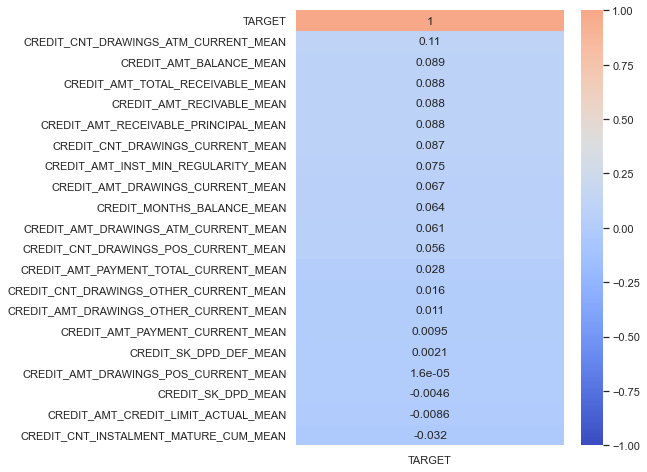

In [101]:
plt.figure(figsize=(6,8))
columns = credit_means.columns.tolist()[1:] + ['TARGET']
sns.heatmap(app_train_copy[columns].corr()[['TARGET']].sort_values(by='TARGET', ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm', center=0.4)
plt.show()

None of the newly created variables has a strong linear correlation, but there could be some promissing results anyway.

Let's take a look at the top 5 positive and negative correlations in the whole training dataset

In [102]:
correlations_to_target = app_train_copy.corr()[['TARGET']].sort_values(by='TARGET', ascending=False).reset_index()

**TOP5 Positive** correlations

In [103]:
correlations_to_target.head()

,index,TARGET
0,TARGET,1.000000
1,CREDIT_CNT_DRAWINGS_ATM_CURRENT_MEAN,0.107751
2,BUREAU_DAYS_CREDIT_MEAN,0.090243
3,CREDIT_AMT_BALANCE_MEAN,0.089034
4,CREDIT_AMT_TOTAL_RECEIVABLE_MEAN,0.088306


**TOP5 Negative** correlations

In [104]:
correlations_to_target.tail()

,index,TARGET
131,AGE,-0.080489
132,EXT_SOURCE_1,-0.155386
133,EXT_SOURCE_2,-0.159621
134,EXT_SOURCE_3,-0.180702
135,EXT_SOURCE_3_LOG,-0.185068


Not bad! All the positive correlations in the top 5 and the most negative correlation are the result of our feature engineering.

Now let's make One-Hote encoding for the categorical variables of the train dataset

In [105]:
app_train_encoded = pd.get_dummies(app_train_copy.drop(['INCOME_BINS', 'LOAN_STATUS', 'GENDER'], axis=1))

Now let's make One-Hote encoding for other datasets, sum up the values and merge with the encoded train dataset

In [106]:
bureau_dummies = dummies(bureau, 'SK_ID_CURR')
previous_application_dummies = dummies(previous_application, 'SK_ID_CURR')
credit_dummies = dummies(credit_card_balance, 'SK_ID_CURR')

In [107]:
# sum up values
bureau_dummies = bureau_dummies.groupby('SK_ID_CURR').agg(['sum']).reset_index()
# rename columns
bureau_dummies.columns = rename_columns_encoding(bureau_dummies, 'BUREAU')

In [108]:
# sum up values
previous_application_dummies = previous_application_dummies.groupby('SK_ID_CURR').agg(['sum']).reset_index()
# rename columns
previous_application_dummies.columns = rename_columns_encoding(previous_application_dummies, 'PREVIOUS')

In [109]:
# sum up values
credit_dummies = credit_dummies.groupby('SK_ID_CURR').agg(['sum']).reset_index()
# rename columns
credit_dummies.columns = rename_columns_encoding(credit_dummies, 'CREDIT')

In [110]:
app_train_encoded = app_train_encoded.merge(bureau_dummies, on='SK_ID_CURR', how='left')
app_train_encoded = app_train_encoded.merge(previous_application_dummies, on='SK_ID_CURR', how='left')
app_train_encoded = app_train_encoded.merge(bureau_dummies, on='SK_ID_CURR', how='left')

#### FEATURE SELECTION

In [111]:
app_train_encoded.shape

(285222, 533)

The number of features grows to 533 from initial 122.

We will not need that much of features for our model, some are redundant, some are with too many missing data. So another task will be to reduce the number of features and leave only important ones.

We are going to do the following:
1. Remove the features with certain threshold of missing values.
2. Test for correlations above threshold
3. Run feature importance with LightLGB model

There is no "correct" amount of NaN's in a column for it to be removed, so we'll try with 50%

In [112]:
# we'll make a copy of dataset not to mess the original
training_data = app_train_encoded.copy()

In [113]:
features_to_remove = features_with_threshold(training_data, 50)

training_data = training_data.drop(features_to_remove, axis=1)

print(f'{len(features_to_remove)} features are dropped')

64 features are dropped


High correlation between variables is another problem.

In [114]:
high_corr_feat = collinear_features(training_data, 0.7)

There are 121 features with correlations above threshold


In [115]:
training_data.drop(high_corr_feat, axis=1, inplace=True)

I will use LightGBM classifier to get our feature importance list because LightGBM natively supports NaN values (and we have plenty of them).

LightGBM clasifier does not support feature names with spaces in it. Since we did one-hot encoding for categorical variables there could be some.

In [116]:
training_data = training_data.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [117]:
y = training_data["TARGET"]
X = training_data.drop(['TARGET', 'SK_ID_CURR'], axis=1)

In [118]:
lgbm_model = lgb.LGBMClassifier(
    n_estimators = 5000,
    objective='binary',
    n_jobs=-1,
    boosting_type = 'goss',
    class_weight = 'balanced')

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.2, random_state = 42)
lgbm_model.fit(
    X_train, 
    y_train, 
    eval_set = [(X_test, y_test)], 
    eval_metric = 'auc', 
    early_stopping_rounds=800,
    verbose = 100)

[100]	valid_0's auc: 0.775261	valid_0's binary_logloss: 0.549521
[200]	valid_0's auc: 0.775347	valid_0's binary_logloss: 0.526993
[300]	valid_0's auc: 0.774879	valid_0's binary_logloss: 0.508222
[400]	valid_0's auc: 0.773053	valid_0's binary_logloss: 0.491895
[500]	valid_0's auc: 0.771302	valid_0's binary_logloss: 0.476382
[600]	valid_0's auc: 0.76959	valid_0's binary_logloss: 0.462234
[700]	valid_0's auc: 0.769394	valid_0's binary_logloss: 0.447751
[800]	valid_0's auc: 0.768002	valid_0's binary_logloss: 0.435723
[900]	valid_0's auc: 0.766823	valid_0's binary_logloss: 0.424991


LGBMClassifier(boosting_type='goss', class_weight='balanced', n_estimators=5000,
               objective='binary')

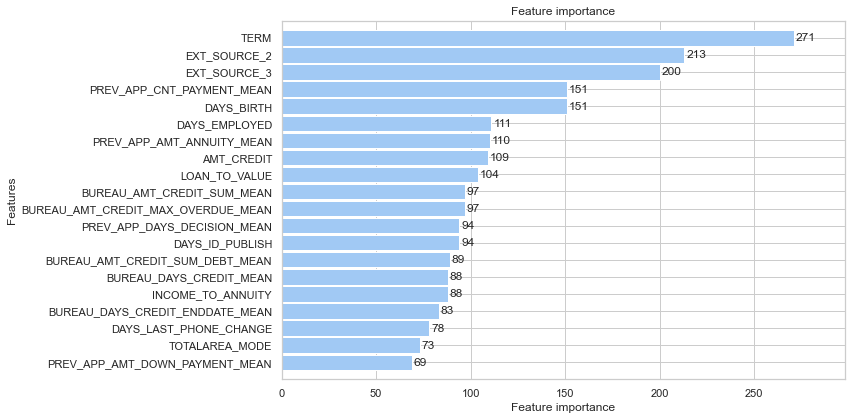

In [120]:
plt.rcParams["figure.figsize"] = (12, 6)
lgb.plot_importance(lgbm_model, max_num_features = 20, height=.9)
plt.tight_layout()

Nice! Bigger part of the most important features are thanks to our feature engineering!

In [121]:
# getting names and importances and putting to dataframe
features = lgbm_model.feature_name_
importances = lgbm_model.feature_importances_
feature_importance = pd.DataFrame({'features':features, 'importance':importances}).sort_values('importance', ascending=False).reset_index(drop=True)
feature_importance

,features,importance
0,TERM,271
1,EXT_SOURCE_2,213
2,EXT_SOURCE_3,200
3,DAYS_BIRTH,151
4,PREV_APP_CNT_PAYMENT_MEAN,151
...,...,...
341,ORGANIZATION_TYPE_Tradetype4,0
342,ORGANIZATION_TYPE_Tradetype5,0
343,ORGANIZATION_TYPE_Tradetype6,0
344,ORGANIZATION_TYPE_Tradetype7,0


We may see there are features with zero importance. Let's check how much.

In [122]:
zero_feats = feature_importance[feature_importance['importance'] == 0]['features'].to_list()
print(f'There are {len(zero_feats)} features with zero importance!')

There are 129 features with zero importance!


Let's drop those features

In [123]:
training_data.drop(zero_feats, axis=1, inplace=True)

In [124]:
training_data.shape

(285222, 219)

So, after feature selection we have reduced the number of features from 533 to 219

If we'd run model again we'd probable find another set of features with zero importance and we could reduce the dataset even more. So we've put everything to custom function where we supply dataset, name of target and id features plus number of iterations we wan't this function to run.

In [125]:
training_data = feature_importance_iter(training_data, 'TARGET', 'SK_ID_CURR', 3)

[100]	valid_0's auc: 0.775261	valid_0's binary_logloss: 0.549521
[200]	valid_0's auc: 0.775795	valid_0's binary_logloss: 0.526616
[300]	valid_0's auc: 0.775304	valid_0's binary_logloss: 0.507221
[400]	valid_0's auc: 0.773796	valid_0's binary_logloss: 0.490525
[500]	valid_0's auc: 0.771855	valid_0's binary_logloss: 0.474527
[600]	valid_0's auc: 0.770561	valid_0's binary_logloss: 0.460876
[700]	valid_0's auc: 0.76874	valid_0's binary_logloss: 0.448433
[800]	valid_0's auc: 0.767586	valid_0's binary_logloss: 0.436803
[900]	valid_0's auc: 0.765489	valid_0's binary_logloss: 0.425716
There is no features with zero importance anymore! It took 1 iterations
Final shape is: (285222, 219)


There is no features to remove. We good to go.

#### IMPUTING MISSING DATA

There are plenty of missing data in our dataset. So in order to use other Classifiers than LightGBM we'll need to fill-in or get rid of NaN values.

For numeric data we can use 'mean' or median' values of the feature, while for categorical data we may use the 'most frequent' value.

In [126]:
# for safety reasons let's make a copy of our dataset
training_data_impute = training_data.copy()

Let's start with numeric features

In [127]:
# get names of numeric columns
cols = training_data_impute.select_dtypes(include=['float64', 'int64']).columns.to_list()

# instantiating and fitting the data
imputer = SimpleImputer(strategy='median', missing_values=np.nan)
imputer = imputer.fit(training_data_impute.select_dtypes(include=['float64', 'int64']))

# imputing the missing data
training_data_impute[cols] = imputer.transform(training_data_impute.select_dtypes(include=['float64', 'int64']))

Let's do the same for categorical data

In [128]:
cols = training_data_impute.select_dtypes(include=['uint8']).columns.to_list()
imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
imputer = imputer.fit(training_data_impute.select_dtypes(include=['uint8']))
training_data_impute[cols] = imputer.transform(training_data_impute.select_dtypes(include=['uint8']))

Just to be sure if we got rid of NaN's

In [129]:
training_data_impute.isnull().sum().sum()

0

### PREDICTIONS

In [175]:
y = training_data_impute['TARGET']
X = training_data_impute.drop(['TARGET', 'SK_ID_CURR'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [176]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

LogisticRegression


Accuracy: 0.6984310631957227
AUC: 0.7615248898753451
F1: 0.2766682083841399
              precision    recall  f1-score   support

         0.0       0.96      0.70      0.81     52316
         1.0       0.17      0.70      0.28      4729

    accuracy                           0.70     57045
   macro avg       0.57      0.70      0.54     57045
weighted avg       0.90      0.70      0.77     57045



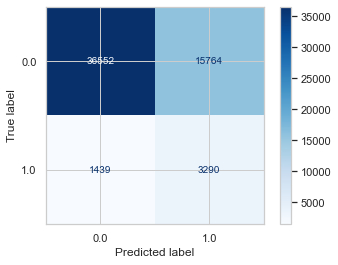

----------------------------------------------------------------------------------------------------


In [135]:
log_reg = LogisticRegression(n_jobs=-1, class_weight='balanced', random_state=42)
log_reg_model, log_res = run_model(log_reg, X_train_scaled, X_test_scaled, y_train, y_test)

RandomForestClassifier


Accuracy: 0.9171005346656149
AUC: 0.7356630149257588
F1: 0.001688832594469073
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     52316
         1.0       0.50      0.00      0.00      4729

    accuracy                           0.92     57045
   macro avg       0.71      0.50      0.48     57045
weighted avg       0.88      0.92      0.88     57045



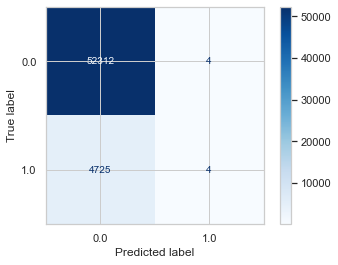

----------------------------------------------------------------------------------------------------


In [136]:
rfc = RandomForestClassifier(n_jobs=-1, class_weight='balanced', random_state=42)
rfc_model, rfc_res = run_model(rfc, X_train_scaled, X_test_scaled, y_train, y_test)

LGBMClassifier


Accuracy: 0.7198001577701815
AUC: 0.7752014972662103
F1: 0.29086069210292814
              precision    recall  f1-score   support

         0.0       0.96      0.72      0.83     52316
         1.0       0.18      0.69      0.29      4729

    accuracy                           0.72     57045
   macro avg       0.57      0.71      0.56     57045
weighted avg       0.90      0.72      0.78     57045



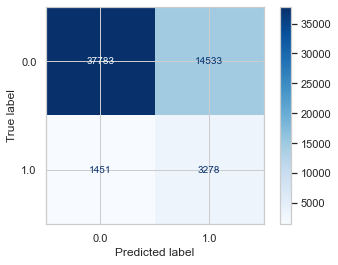

----------------------------------------------------------------------------------------------------


In [137]:
lgbm = lgb.LGBMClassifier(n_jobs=-1, class_weight='balanced', random_state=42)
lgbm_model, lgbm_res = run_model(lgbm, X_train_scaled, X_test_scaled, y_train, y_test)

#### HYPERPARAMETERS TUNING

In [138]:
clf = lgb.LGBMClassifier(n_estimators=20)

param_grid = {
    'boosting_type': ['gbdt', 'goss'],
     'num_leaves': sp_randint(6, 50), 
     'min_child_samples': sp_randint(100, 500), 
     'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
     'subsample': sp_uniform(loc=0.2, scale=0.8), 
     'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
     'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
     'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]
}

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_grid, n_jobs=-1, verbose=10,
                                   n_iter=n_iter_search)


random_search.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(estimator=LGBMClassifier(n_estimators=20), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'boosting_type': ['gbdt', 'goss'],
                                        'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020581D03F70>,
                                        'min_child_samples': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000205F17CD910>,
                                        'min_child_weight': [1e-05, 0.001, 0.01,
                                                             0.1, 1, 10.0,
                                                             100.0, 1000.0,
                                                             10000.0],
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000205F27D3550>,
                                        'reg_alpha': [0, 0.1, 1, 2, 5, 7, 10,
                                                      50, 100],
                                        'reg_lambda': [0, 0.1, 1, 5, 10, 20, 50,
                                                       100],
                                        'subsample': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000205F27D3730>},
                   verbose=10)

In [139]:
random_search.best_params_

{'boosting_type': 'goss',
 'colsample_bytree': 0.40769025414604204,
 'min_child_samples': 263,
 'min_child_weight': 1,
 'num_leaves': 30,
 'reg_alpha': 1,
 'reg_lambda': 0.1,
 'subsample': 0.6661235348473952}

In [143]:
#Create weights
weights = {1: 9.5}

LGBMClassifier


Accuracy: 0.7559996493995969
AUC: 0.7750246557870402
F1: 0.3015705755431783
              precision    recall  f1-score   support

         0.0       0.96      0.77      0.85     52316
         1.0       0.20      0.64      0.30      4729

    accuracy                           0.76     57045
   macro avg       0.58      0.70      0.58     57045
weighted avg       0.90      0.76      0.81     57045



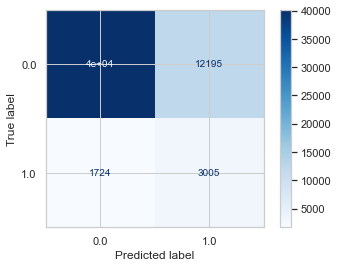

----------------------------------------------------------------------------------------------------


In [145]:
lgbm_hyp = lgb.LGBMClassifier(n_jobs=-1, class_weight=weights, boosting_type='goss', colsample_bytree=0.4864548488153909, min_child_samples=162, min_child_weight=1e-05, num_leaves=40, reg_alpha=2, reg_lambda=5, subsample=0.7535319365227753, random_state=42)
lgbm_model_hyp, lgbm_hyp_res = run_model(lgbm_hyp, X_train_scaled, X_test_scaled, y_train, y_test)

____________________________________________________________________________________________________

#### MODEL WITHOUT FEATURE ENGINEERING

In [179]:
# to_remove = training_data_impute.filter(like='_SUM').columns.to_list()
# to_remove += training_data_impute.filter(like='_MEAN').columns.to_list()
# to_remove += ['LOAN_TO_VALUE', 'INCOME_TO_ANNUITY', 'INCOME_TO_CREDIT', 'TERM']
# training_data_impute_no_feat = training_data_impute.drop(to_remove, axis=1)

df_app_train = pd.read_csv('./data/application_train.csv')
df_app_train = pd.get_dummies(df_app_train.dropna())

In [180]:
y = df_app_train['TARGET']
X = df_app_train.drop(['TARGET', 'SK_ID_CURR'], axis=1)

X_train_no_feat, X_test_no_feat, y_train_no_feat, y_test_no_feat = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [181]:
scaler = StandardScaler()
X_train_scaled_no_feat = scaler.fit_transform(X_train_no_feat)
X_test_scaled_no_feat = scaler.transform(X_test_no_feat)

LGBMClassifier


Accuracy: 0.8669378268448577
AUC: 0.7108026874115982
F1: 0.239202657807309
              precision    recall  f1-score   support

           0       0.95      0.90      0.93      1616
           1       0.18      0.34      0.24       105

    accuracy                           0.87      1721
   macro avg       0.57      0.62      0.58      1721
weighted avg       0.91      0.87      0.89      1721



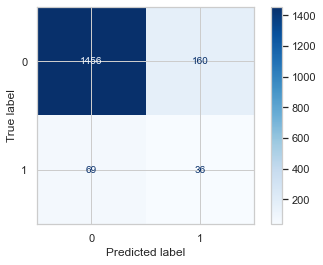

----------------------------------------------------------------------------------------------------


In [182]:
lgbm_hyp_no_feat = lgb.LGBMClassifier(n_jobs=-1, class_weight=weights, boosting_type='goss', colsample_bytree=0.4864548488153909, min_child_samples=162, min_child_weight=1e-05, num_leaves=40, reg_alpha=2, reg_lambda=5, subsample=0.7535319365227753, random_state=42)
lgbm_model_hypno_feat, lgbm_hyp_no_feat = run_model(lgbm_hyp_no_feat, X_train_scaled_no_feat, X_test_scaled_no_feat, y_train_no_feat, y_test_no_feat)

#### EVALUATING THE MODEL

In [184]:
models = [log_reg_model, rfc_model, lgbm_model, lgbm_model_hyp]

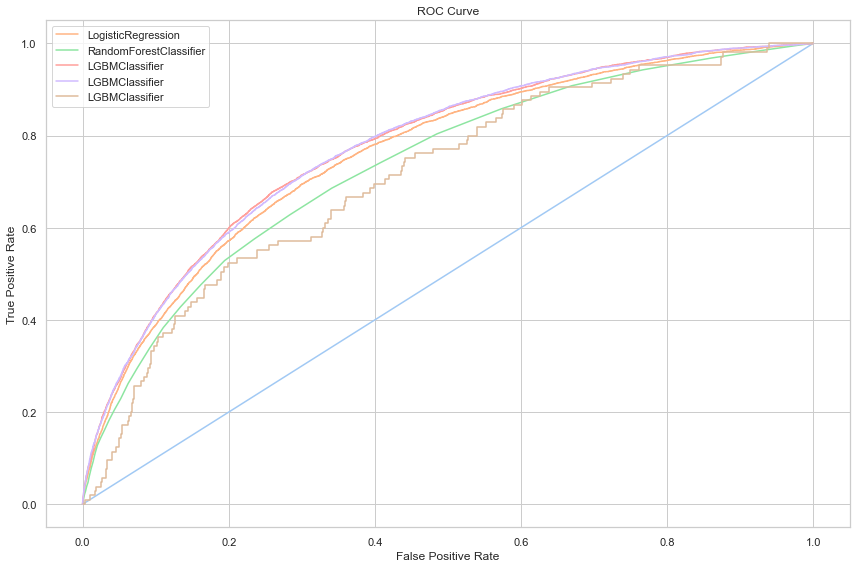

In [186]:
roc_auc_plot(models, X_test_scaled, y_test, lgbm_model_hypno_feat, X_test_scaled_no_feat, y_test_no_feat)

#### SAVING THE MODEL

In [ ]:
joblib.dump(lgbm_model_hyp, 'lgbm_model.pkl')

#### TEST DATA

In [156]:
test = training_data_impute.sample(10)
test

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,LOAN_TO_VALUE,INCOME_TO_ANNUITY,INCOME_TO_CREDIT,TERM,PREV_LOANS,PREV_OVERDUE,PREV_APP_AMT_ANNUITY_MEAN,PREV_APP_AMT_DOWN_PAYMENT_MEAN,PREV_APP_HOUR_APPR_PROCESS_START_MEAN,PREV_APP_NFLAG_LAST_APPL_IN_DAY_MEAN,PREV_APP_RATE_DOWN_PAYMENT_MEAN,PREV_APP_DAYS_DECISION_MEAN,PREV_APP_SELLERPLACE_AREA_MEAN,PREV_APP_CNT_PAYMENT_MEAN,PREV_APP_DAYS_FIRST_DRAWING_MEAN,PREV_APP_DAYS_FIRST_DUE_MEAN,PREV_APP_DAYS_LAST_DUE_MEAN,PREV_APP_NFLAG_INSURED_ON_APPROVAL_MEAN,BUREAU_DAYS_CREDIT_MEAN,BUREAU_DAYS_CREDIT_ENDDATE_MEAN,BUREAU_AMT_CREDIT_MAX_OVERDUE_MEAN,BUREAU_CNT_CREDIT_PROLONG_MEAN,BUREAU_AMT_CREDIT_SUM_MEAN,BUREAU_AMT_CREDIT_SUM_DEBT_MEAN,BUREAU_AMT_CREDIT_SUM_LIMIT_MEAN,BUREAU_AMT_CREDIT_SUM_OVERDUE_MEAN,NAME_CONTRACT_TYPE_Cashloans,CODE_GENDER_F,FLAG_OWN_CAR_N,FLAG_OWN_REALTY_N,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Spousepartner,NAME_INCOME_TYPE_Commercialassociate,NAME_INCOME_TYPE_Stateservant,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academicdegree,NAME_EDUCATION_TYPE_Highereducation,NAME_EDUCATION_TYPE_Incompletehigher,NAME_FAMILY_STATUS_Civilmarriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Singlenotmarried,NAME_HOUSING_TYPE_Houseapartment,NAME_HOUSING_TYPE_Municipalapartment,NAME_HOUSING_TYPE_Rentedapartment,NAME_HOUSING_TYPE_Withparents,FLAG_WORK_PHONE_0,FLAG_PHONE_0,FLAG_EMAIL_0,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaningstaff,OCCUPATION_TYPE_Cookingstaff,OCCUPATION_TYPE_Corestaff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HRstaff,OCCUPATION_TYPE_Highskilltechstaff,OCCUPATION_TYPE_ITstaff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_LowskillLaborers,OCCUPATION_TYPE_Medicinestaff,OCCUPATION_TYPE_Privateservicestaff,OCCUPATION_TYPE_Salesstaff,OCCUPATION_TYPE_Securitystaff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,REG_REGION_NOT_LIVE_REGION_0,REG_REGION_NOT_WORK_REGION_0,REG_CITY_NOT_LIVE_CITY_0,REG_CITY_NOT_WORK_CITY_0,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_BusinessEntityType1,ORGANIZATION_TYPE_BusinessEntityType2,ORGANIZATION_TYPE_BusinessEntityType3,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Industrytype3,ORGANIZATION_TYPE_Industrytype5,ORGANIZATION_TYPE_Industrytype9,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_SecurityMinistries,ORGANIZATION_TYPE_Selfemployed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Transporttype1,ORGANIZATION_TYPE_Transporttype3,ORGANIZATION_TYPE_Transporttype4,FONDKAPREMONT_MODE_notspecified,FONDKAPREMONT_MODE_orgspecaccount,FONDKAPREMONT_MODE_regoperaccount,FONDKAPREMONT_MODE_regoperspecaccount,HOUSETYPE_MODE_specifichousing,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Panel,WALLSMATERIAL_MODE_Stonebrick,FLAG_DOCUMENT_3_0,FLAG_DOCUMENT_6_0,FLAG_DOCUMENT_13_0,FLAG_DOCUMENT_14_0,FLAG_DOCUMENT_15_0,FLAG_DOCUMENT_16_0,FLAG_DOCUMENT_18_0,AGE_LABELS_30s,AGE_LABELS_40s,AGE_LABELS_50s,BUREAU_CREDIT_ACTIVE_Active_SUM_x,BUREAU_CREDIT_ACTIVE_Sold_SUM_x,BUREAU_CREDIT_CURRENCY_currency2_SUM_x,BUREAU_CREDIT_CURRENCY_currency3_SUM_x,BUREAU_CREDIT_TYPE_Carloan_SUM_x,BUREAU_CREDIT_TYPE_Creditcard_SUM_x,BUREAU_CREDIT_TYPE_Microloan_SUM_x,BUREAU_CREDIT_TYPE_Mortgage_SUM_x,PREVIOUS_NAME_CONTRACT_TYPE_Cashloans_SUM,PREVIOUS_NAME_CONTRAC

In [157]:
test.drop('TARGET', axis=1).to_csv('test.csv')